* The goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, you'll be     predicting two probabilities: one for h1n1vaccine and one for seasonal vaccine as well as any sophisticates EDAs.

* Each row in the dataset represents one person who responded to the National 2009 H1N1 Flu Survey and there are two target variables:

* h1n1_vaccine: Whether respondent received H1N1 flu vaccine.
* seasonal_vaccine: Whether respondent received seasonal flu vaccine.

* Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both. This is formulated as a multilabel (and not multiclass) problem.

* You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below(For all binary variables: 0 = No; 1 = Yes) :

* age_group - Age group of respondent.
* education - Self-reported education level.
* race - Race of respondent.
* sex - Gender of respondent.
* income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
* marital_status - Marital status of respondent.
* rentorown - Housing situation of respondent.
* employment_status - Employment status of respondent.
* h1n1_concern - Level of concern about the H1N1 flu.
* 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
* h1n1_knowledge - Level of knowledge about H1N1 flu.
* 0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
* behavioralwashhands - Has frequently washed hands or used hand sanitizer. (binary)
* behaviorallargegatherings - Has reduced time at large gatherings. (binary)
* behavioralantiviralmeds - Has taken antiviral medications. (binary)
* behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
* behavioralfacemask - Has bought a face mask. (binary)
* behavioraloutsidehome - Has reduced contact with people outside of own household. (binary)
* behavioraltouchface - Has avoided touching eyes, nose, or mouth. (binary)
* doctorrecch1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
* doctorreccseasonal - Seasonal flu vaccine was recommended by doctor. (binary)
* chronicmedcondition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
* childunder6_months - Has regular close contact with a child under the age of six months. (binary)
* health_worker - Is a healthcare worker. (binary)
* health_insurance - Has health insurance. (binary)
* opinionh1n1vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
* 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
* opinionh1n1risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
* 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
* opinionh1n1sickfromvacc - Respondent's worry of getting sick from taking H1N1 vaccine.
* 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
* opinionseasvacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
* 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
* opinionseasrisk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
* 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
* opinionseassickfromvacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
* 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
* hhsgeoregion - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
* census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
* household_adults - Number of other adults in household, top-coded to 3.
* household_children - Number of children in household, top-coded to 3.
* employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
* employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import plotly.graph_objs as go
import plotly.offline as py

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("H1N1_Flu_Vaccines.csv")

In [3]:
data.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...  rent_or_own   employment_status  \
0                    1.0  ...          Own  Not in Labor Force   
1                    1.0  ...         Rent            Employed   
2                    0.0  ...          Own            Employed   
3                    0.0  ...         Rent  Not in Labor Force   
4                    1.0  ...          Own            Employed   

   hhs_geo_region                census_msa  household_adults  \
0        oxchjgsf                   Non-MSA               0.0   
1        bhuqouqj  MSA, Not Principle  City               0.0   
2        qufhixun  MSA, Not Principle  City               2.0   
3        lrircsnp       MSA, Principle City               0.0   
4        qufhixun  MSA, Not Principle  City               1.0   

   household_children  employment_industry  employment_occupation  \
0                 0.0                  NaN                    NaN   
1                 0.0             pxcmvdjn               xgwztkwe   
2                 0.0             rucpziij               xtkaffoo   
3                 0.0                  NaN                    NaN   
4                 0.0             wxleyezf               emcorrxb   

   h1n1_vaccine  seasonal_vaccine  
0             0                 0  
1             0                 1  
2             0                 0  
3             0                 1  
4             0                 0  

[5 rows x 38 columns]

In [4]:
data.shape

(26707, 38)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

# Total Unique Values:

In [6]:
data.nunique()

respondent_id                  26707
h1n1_concern                       4
h1n1_knowledge                     3
behavioral_antiviral_meds          2
behavioral_avoidance               2
behavioral_face_mask               2
behavioral_wash_hands              2
behavioral_large_gatherings        2
behavioral_outside_home            2
behavioral_touch_face              2
doctor_recc_h1n1                   2
doctor_recc_seasonal               2
chronic_med_condition              2
child_under_6_months               2
health_worker                      2
health_insurance                   2
opinion_h1n1_vacc_effective        5
opinion_h1n1_risk                  5
opinion_h1n1_sick_from_vacc        5
opinion_seas_vacc_effective        5
opinion_seas_risk                  5
opinion_seas_sick_from_vacc        5
age_group                          5
education                          4
race                               4
sex                                2
income_poverty                     3
m

# Total Missing Values:

In [7]:
data.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [8]:
data.drop(columns=['respondent_id','doctor_recc_seasonal','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc','seasonal_vaccine'], inplace=True)

In [9]:
summary=data.describe().T
summary

count      mean       std  min  25%  50%  75%  \
h1n1_concern                 26615.0  1.618486  0.910311  0.0  1.0  2.0  2.0   
h1n1_knowledge               26591.0  1.262532  0.618149  0.0  1.0  1.0  2.0   
behavioral_antiviral_meds    26636.0  0.048844  0.215545  0.0  0.0  0.0  0.0   
behavioral_avoidance         26499.0  0.725612  0.446214  0.0  0.0  1.0  1.0   
behavioral_face_mask         26688.0  0.068982  0.253429  0.0  0.0  0.0  0.0   
behavioral_wash_hands        26665.0  0.825614  0.379448  0.0  1.0  1.0  1.0   
behavioral_large_gatherings  26620.0  0.358640  0.479610  0.0  0.0  0.0  1.0   
behavioral_outside_home      26625.0  0.337315  0.472802  0.0  0.0  0.0  1.0   
behavioral_touch_face        26579.0  0.677264  0.467531  0.0  0.0  1.0  1.0   
doctor_recc_h1n1             24547.0  0.220312  0.414466  0.0  0.0  0.0  0.0   
chronic_med_condition        25736.0  0.283261  0.450591  0.0  0.0  0.0  1.0   
child_under_6_months         25887.0  0.082590  0.275266  0.0  0.0  0.0  0.0   
health_worker                25903.0  0.111918  0.315271  0.0  0.0  0.0  0.0   
health_insurance             14433.0  0.879720  0.325300  0.0  1.0  1.0  1.0   
opinion_h1n1_vacc_effective  26316.0  3.850623  1.007436  1.0  3.0  4.0  5.0   
opinion_h1n1_risk            26319.0  2.342566  1.285539  1.0  1.0  2.0  4.0   
opinion_h1n1_sick_from_vacc  26312.0  2.357670  1.362766  1.0  1.0  2.0  4.0   
household_adults             26458.0  0.886499  0.753422  0.0  0.0  1.0  1.0   
household_children           26458.0  0.534583  0.928173  0.0  0.0  0.0  1.0   
h1n1_vaccine                 26707.0  0.212454  0.409052  0.0  0.0  0.0  0.0   

                             max  
h1n1_concern                 3.0  
h1n1_knowledge               2.0  
behavioral_antiviral_meds    1.0  
behavioral_avoidance         1.0  
behavioral_face_mask         1.0  
behavioral_wash_hands        1.0  
behavioral_large_gatherings  1.0  
behavioral_outside_home      1.0  
behavioral_touch_face        1.0  
doctor_recc_h1n1             1.0  
chronic_med_condition        1.0  
child_under_6_months         1.0  
health_worker                1.0  
health_insurance             1.0  
opinion_h1n1_vacc_effective  5.0  
opinion_h1n1_risk            5.0  
opinion_h1n1_sick_from_vacc  5.0  
household_adults             3.0  
household_children           3.0  
h1n1_vaccine                 1.0

# Exploratory Data Analysis:

# Univariate Analysis:

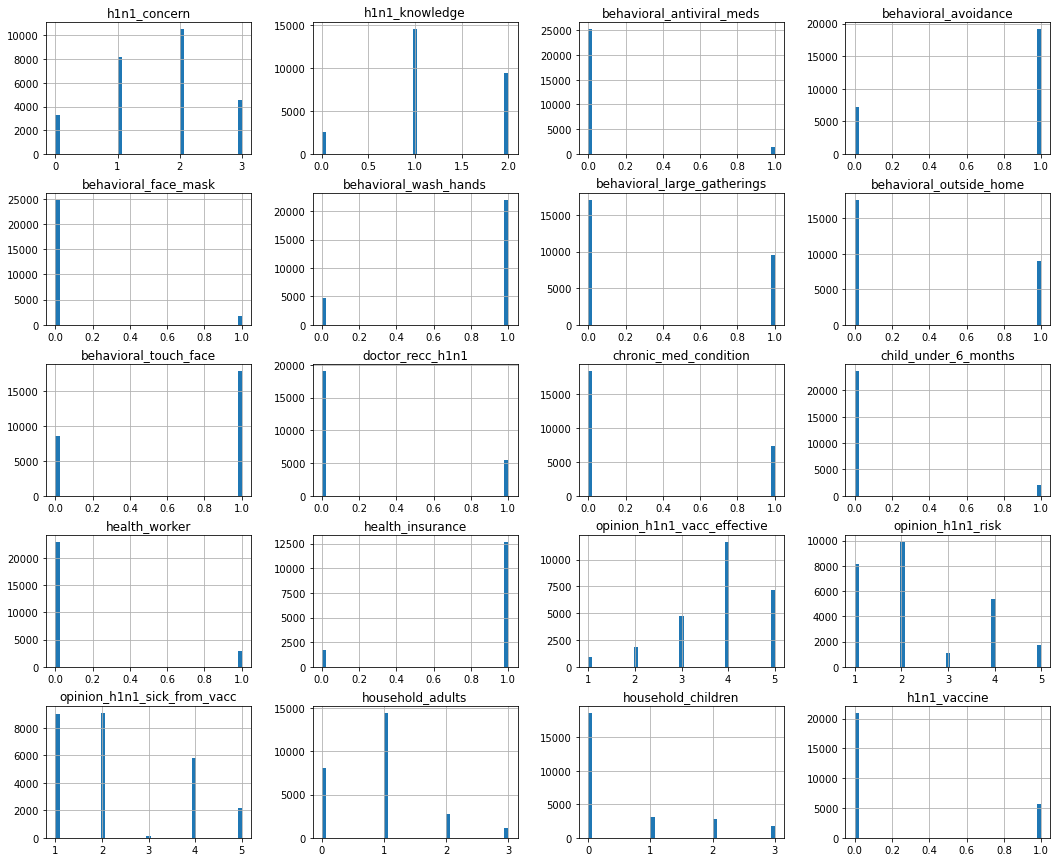

In [10]:
data.hist(bins = 45, figsize = (18,15))
plt.show()

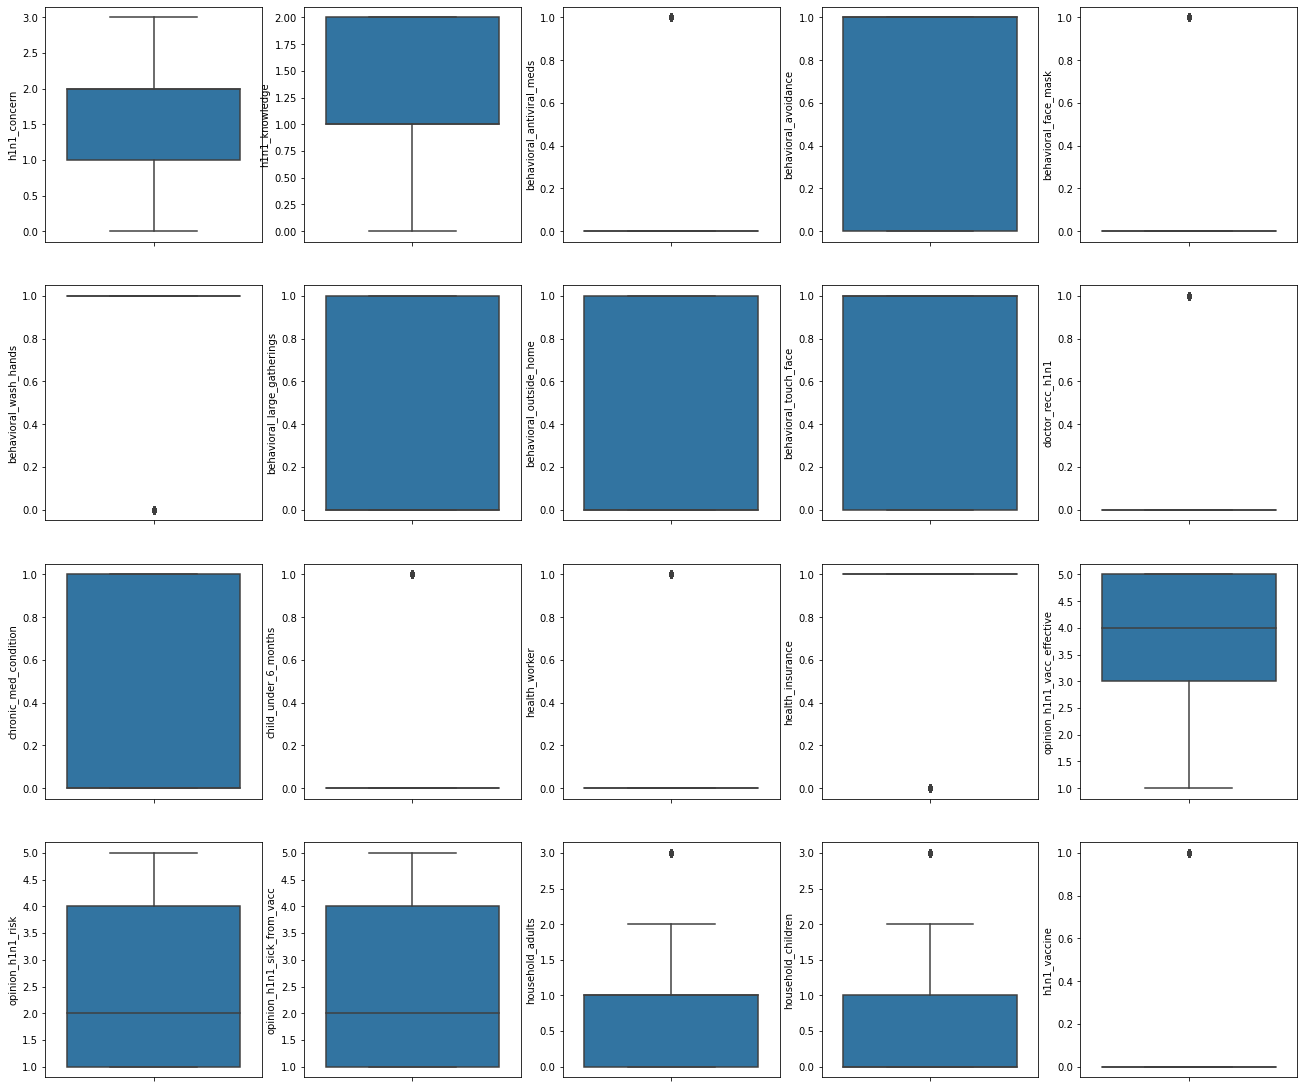

In [11]:
fig, ax = plt.subplots(ncols = 5, nrows = 4, figsize = (18,15))
index = 0
ax = ax.flatten()

for col, value in data.drop(columns=['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa','employment_industry','employment_occupation']).items():
    if col != 'type':
        sns.boxplot(y = col, data = data.drop(columns=['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa','employment_industry','employment_occupation']), ax = ax[index])
        index += 1
plt.tight_layout(pad = 0.3, w_pad = 0.4, h_pad = 4.0)

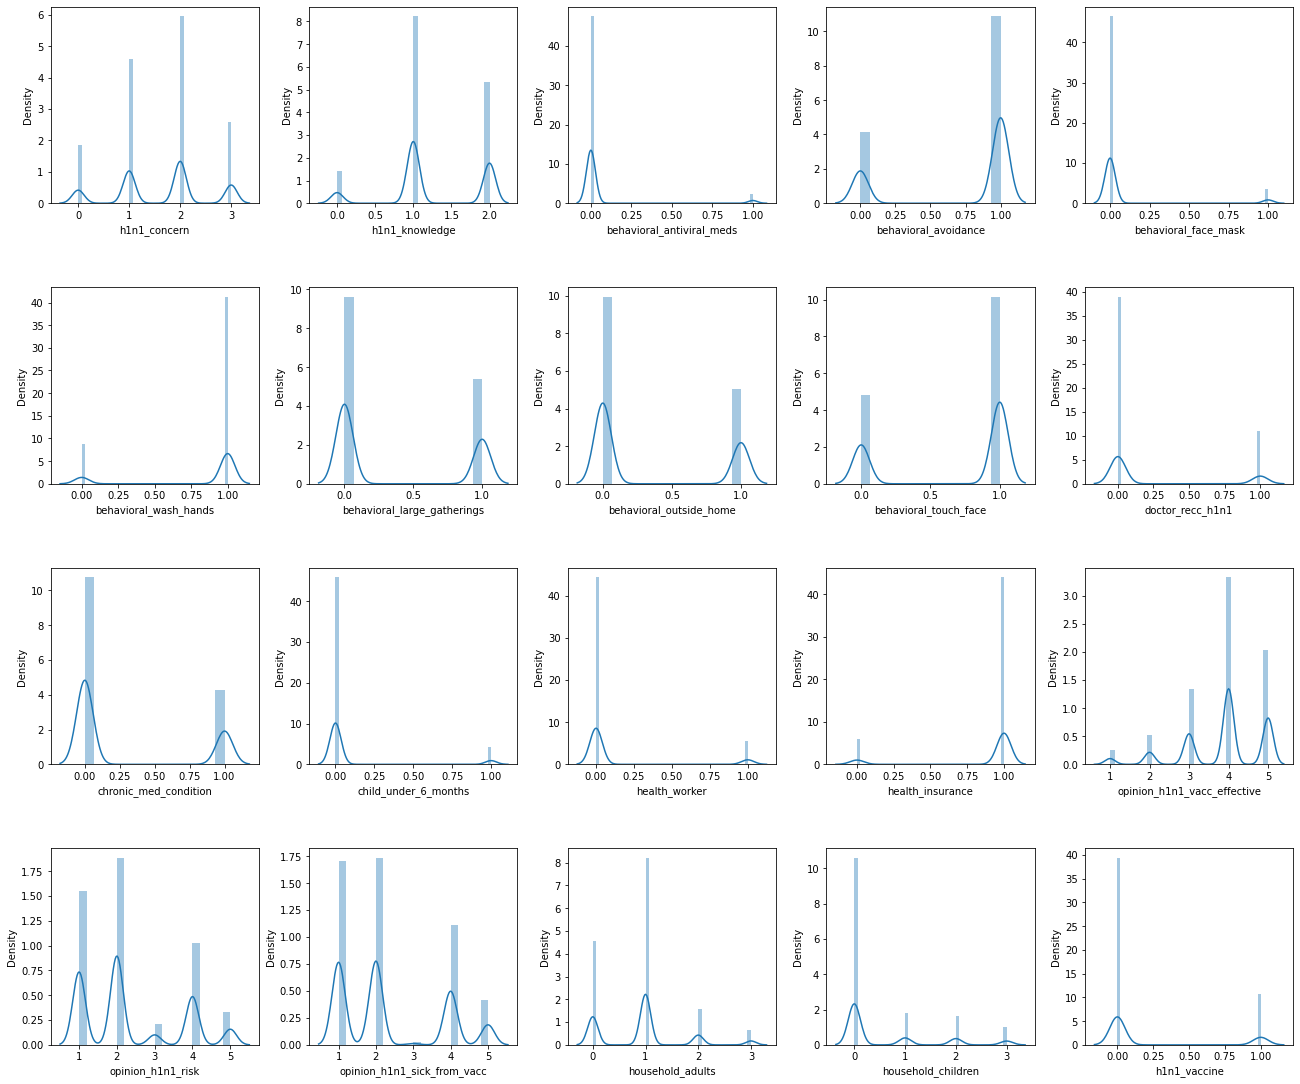

In [12]:
fig, ax = plt.subplots(ncols = 5, nrows = 4, figsize = (18,15))
index = 0
ax = ax.flatten()

for col, value in data.drop(columns=['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa','employment_industry','employment_occupation']).items():
    if col != 'type':
        sns.distplot(value, ax = ax[index])
        index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

# 1) Level of concern about the H1N1 flu

<AxesSubplot:xlabel='h1n1_concern', ylabel='count'>

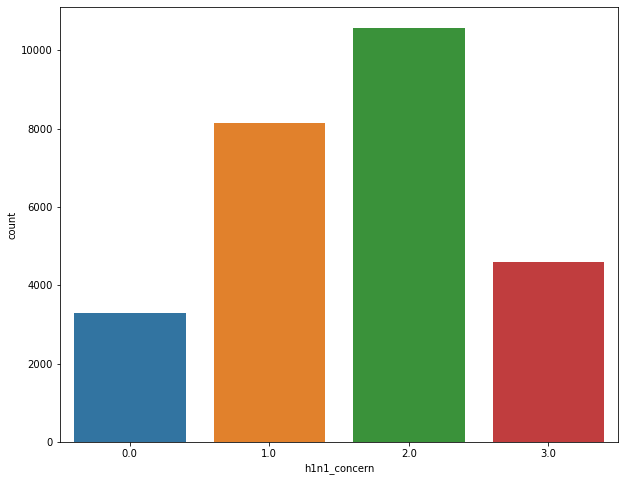

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(data['h1n1_concern'])

* More people have somewhat concern(2) about h1n1 vaccine. 

# Level of knowledge about H1N1 flu.

## 0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

<AxesSubplot:xlabel='h1n1_knowledge', ylabel='count'>

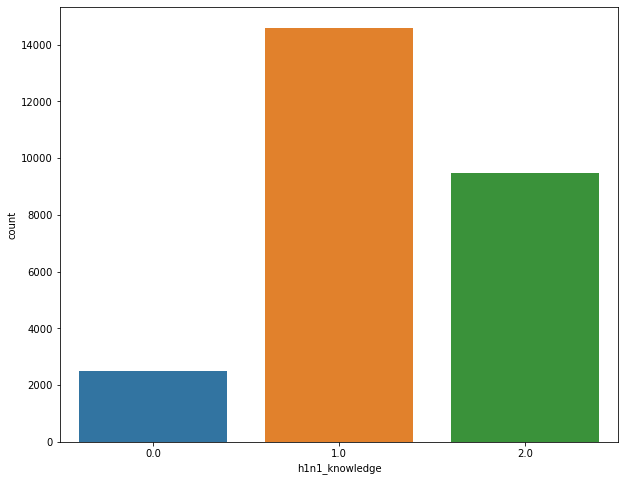

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(data['h1n1_knowledge'])

* more people have a little knowledge about H1N1 flu.

# Taken antiviral medications

0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64

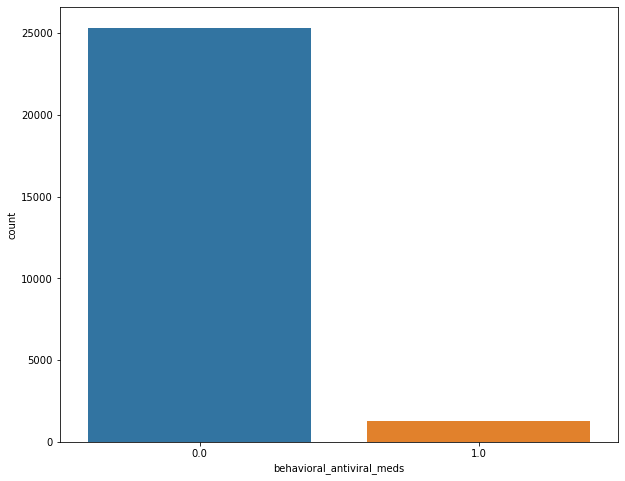

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(data['behavioral_antiviral_meds'])
data['behavioral_antiviral_meds'].value_counts()

* few people has taken antiviral medications, we can say that 4% of 25335 is 1301 means 4% of people has taken antiviral medications

# Avoided close contact with others with flu-like symptoms

1.0    19228
0.0     7271
Name: behavioral_avoidance, dtype: int64

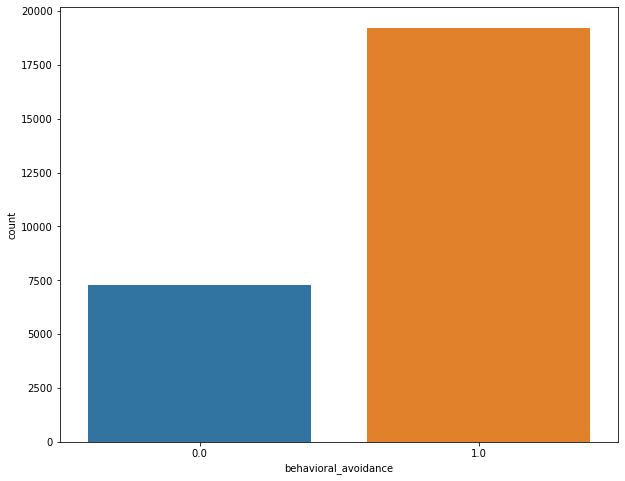

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(data['behavioral_avoidance'])
data['behavioral_avoidance'].value_counts()

* more people has avoided close contact with others with flu like symptoms

# Bought a face mask

0.0    24847
1.0     1841
Name: behavioral_face_mask, dtype: int64

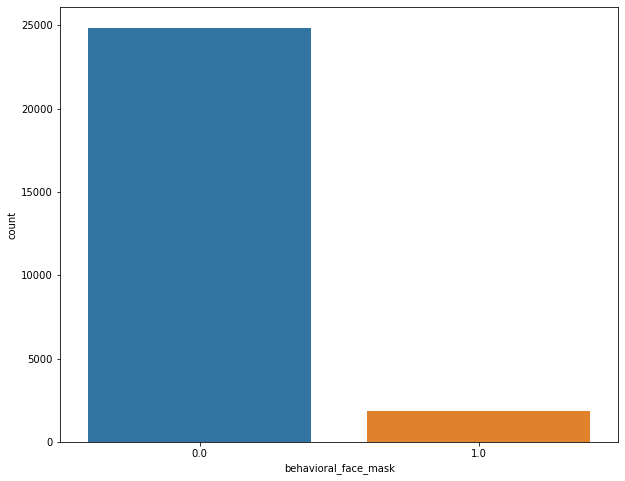

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(data['behavioral_face_mask'])
data['behavioral_face_mask'].value_counts()

* more people doesn't bought a face mask. we can say that 92% people doesnt bought a face mask 

# frequently washed hands or used hand sanitizer

1.0    22015
0.0     4650
Name: behavioral_wash_hands, dtype: int64

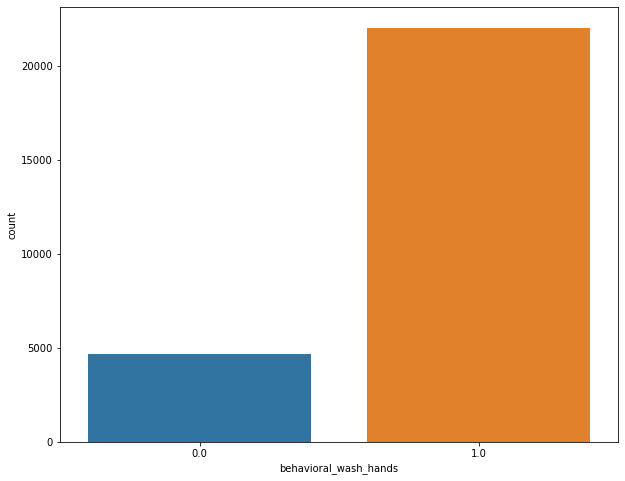

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(data['behavioral_wash_hands'])
data['behavioral_wash_hands'].value_counts()

* more people take care of washing hands frequntly or use hand sanitizer

# Reduced time at large gatherings

0.0    17073
1.0     9547
Name: behavioral_large_gatherings, dtype: int64

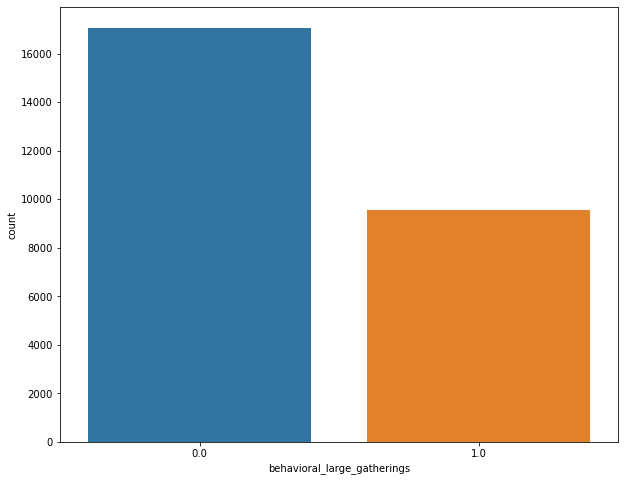

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(data['behavioral_large_gatherings'])
data['behavioral_large_gatherings'].value_counts()

* few people has reduced time at large gatherings

0.0    17644
1.0     8981
Name: behavioral_outside_home, dtype: int64

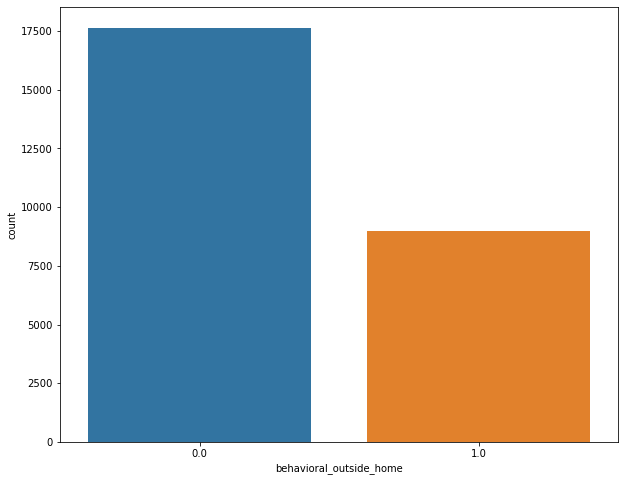

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(data['behavioral_outside_home'])
data['behavioral_outside_home'].value_counts()

* 50% respondent has reduced contact with people outside of own household.

1.0    18001
0.0     8578
Name: behavioral_touch_face, dtype: int64

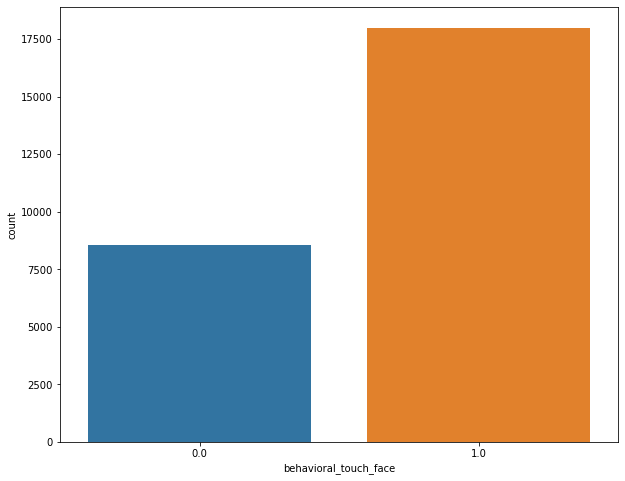

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(data['behavioral_touch_face'])
data['behavioral_touch_face'].value_counts()

* most of the people has avoided touching eyes, nose or mouth.

# H1N1 flu vaccine was recommended by doctor

0.0    19139
1.0     5408
Name: doctor_recc_h1n1, dtype: int64

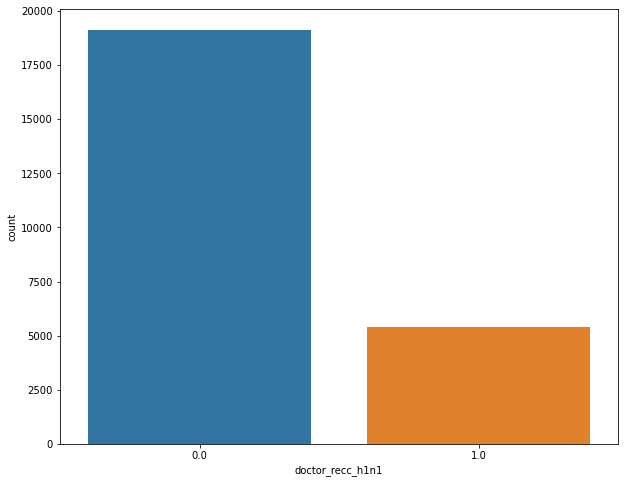

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(data['doctor_recc_h1n1'])
data['doctor_recc_h1n1'].value_counts()

* very few people are recommended by doctor to get h1n1 flu vaccination.

# chronic medical condition

0.0    18446
1.0     7290
Name: chronic_med_condition, dtype: int64

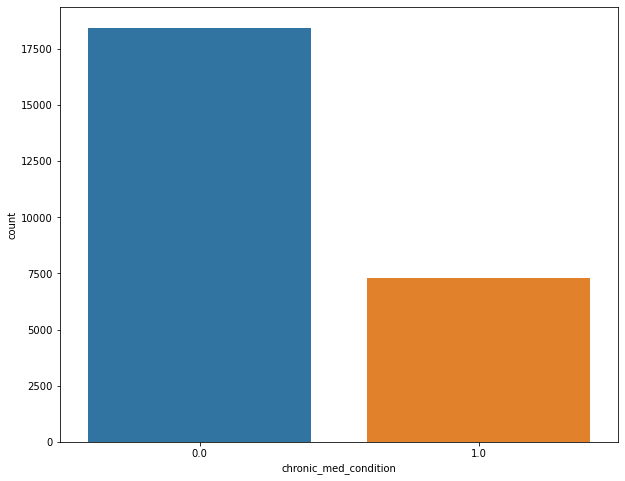

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(data['chronic_med_condition'])
data['chronic_med_condition'].value_counts()

* Few people have chronic medical conditions like asthma or an other lung condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition,a liver condition, or a weakend immune system caused by a chronic illness or by medicines taken for a chronic illness

# Has regular close contact with a child under the age of six months

0.0    23749
1.0     2138
Name: child_under_6_months, dtype: int64

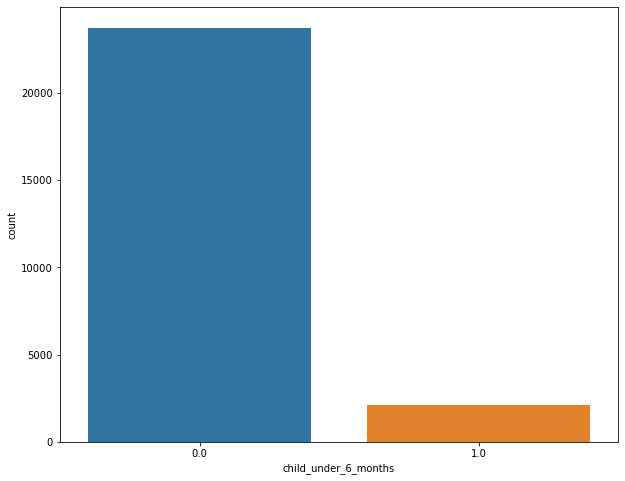

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(data['child_under_6_months'])
data['child_under_6_months'].value_counts()

 * more respondent are above age group of 6

# Healthcare worker

0.0    23004
1.0     2899
Name: health_worker, dtype: int64

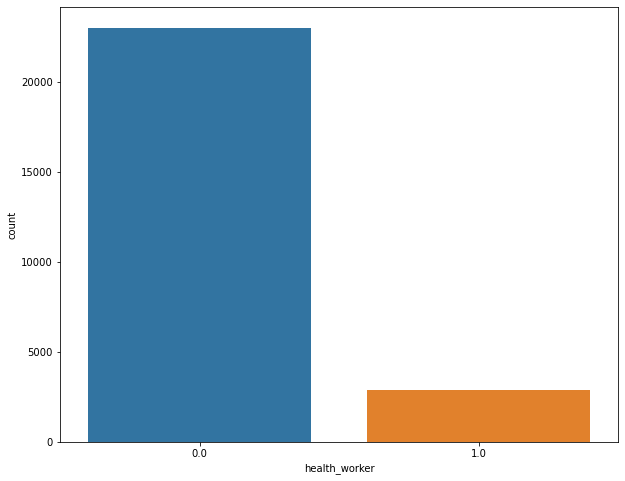

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(data['health_worker'])
data['health_worker'].value_counts()

* More respondent are not a healthcare worker

# Health insurance

1.0    12697
0.0     1736
Name: health_insurance, dtype: int64

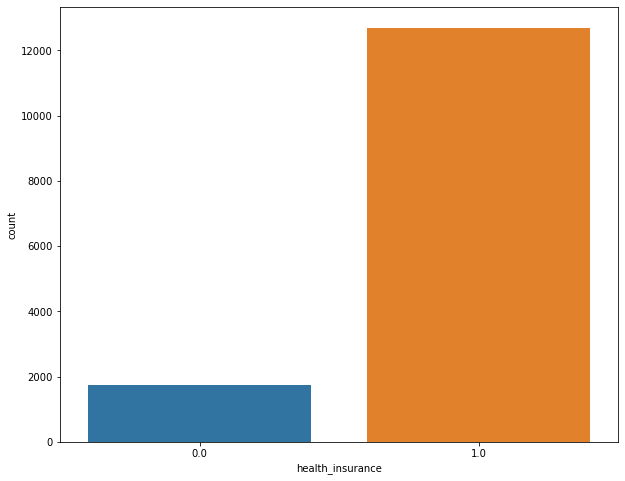

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(data['health_insurance'])
data['health_insurance'].value_counts()

* More respondent has health insurance 

# opinionh1n1vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.

## 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

4.0    11683
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: opinion_h1n1_vacc_effective, dtype: int64

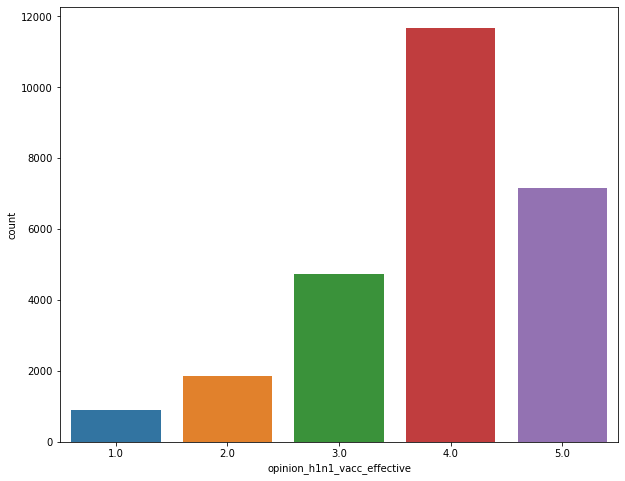

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(data['opinion_h1n1_vacc_effective'])
data['opinion_h1n1_vacc_effective'].value_counts()

* More respondendent said h1n1 vaccine is somewhat effective

# opinionh1n1risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.

## 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high

2.0    9919
1.0    8139
4.0    5394
5.0    1750
3.0    1117
Name: opinion_h1n1_risk, dtype: int64

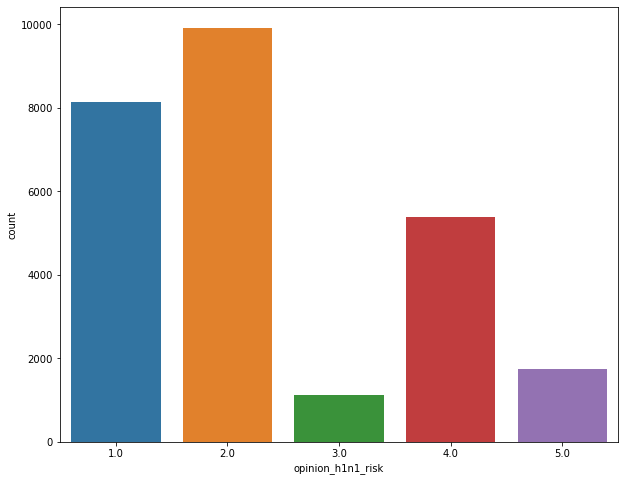

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(data['opinion_h1n1_risk'])
data['opinion_h1n1_risk'].value_counts()

* Respondent's opinion about risk of getting sick with H1N1 flu without vaccine is somewhat low.

# opinionh1n1sickfromvacc - Respondent's worry of getting sick from taking H1N1 vaccine.

## 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried

2.0    9129
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: opinion_h1n1_sick_from_vacc, dtype: int64

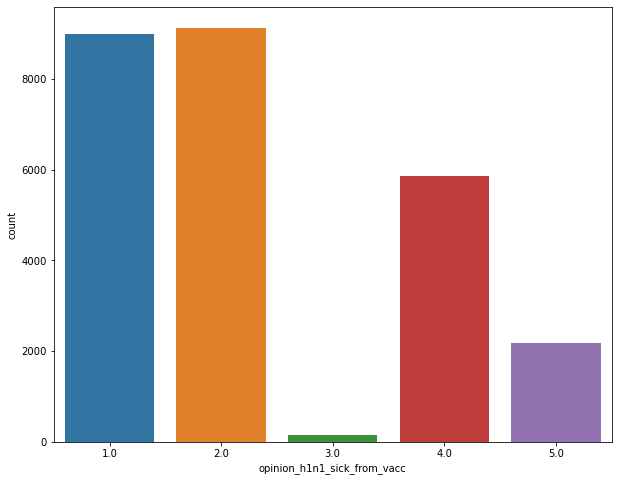

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(data['opinion_h1n1_sick_from_vacc'])
data['opinion_h1n1_sick_from_vacc'].value_counts()

* Respondent's are not very worried of getting sick from taking H1N1 vaccine means vaccine is not harmful and result is also good.

# Age group of respondent

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

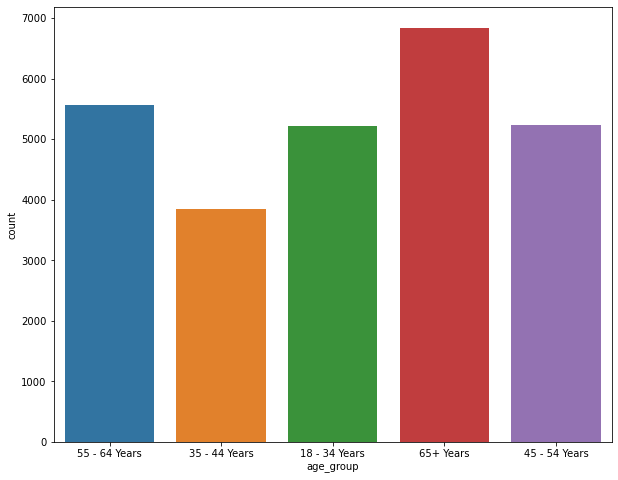

In [30]:
plt.figure(figsize=(10,8))
sns.countplot(data['age_group'])
data['age_group'].value_counts()

* Most of the respondents are above 65+ years old

# Self-reported education level

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64

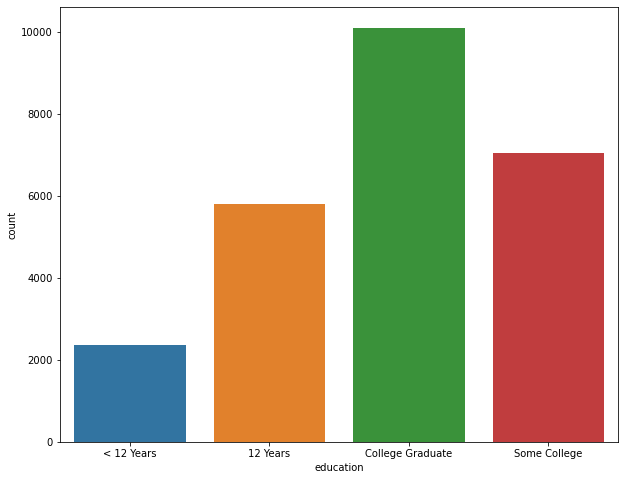

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(data['education'])
data['education'].value_counts()

* We observe that more respondents are college graduate

# Race of respondent/ethnicity of the respondent
White, black, asian,african

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

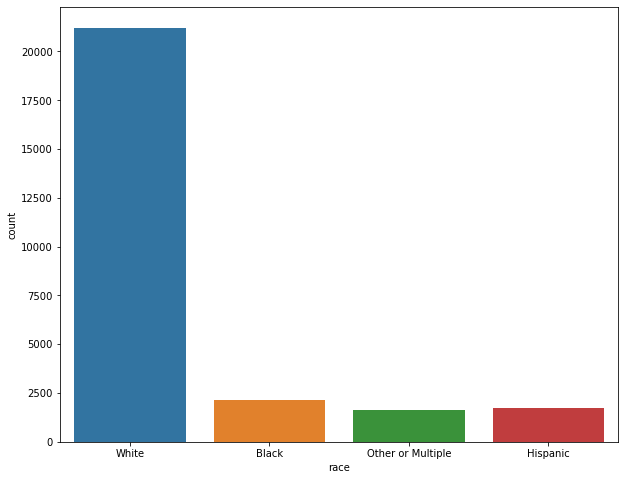

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(data['race'])
data['race'].value_counts()

* more respondents are having race white

# Gender of respondent

Female    15858
Male      10849
Name: sex, dtype: int64

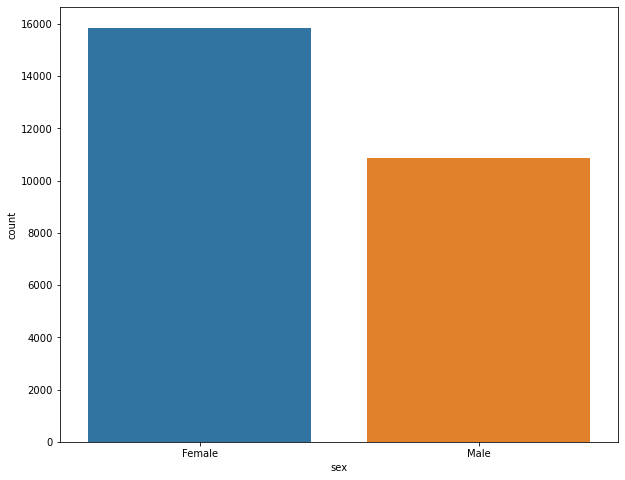

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(data['sex'])
data['sex'].value_counts()

* Females are little bit more than male

# Household annual income of respondent with respect to 2008 Census poverty thresholds

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64

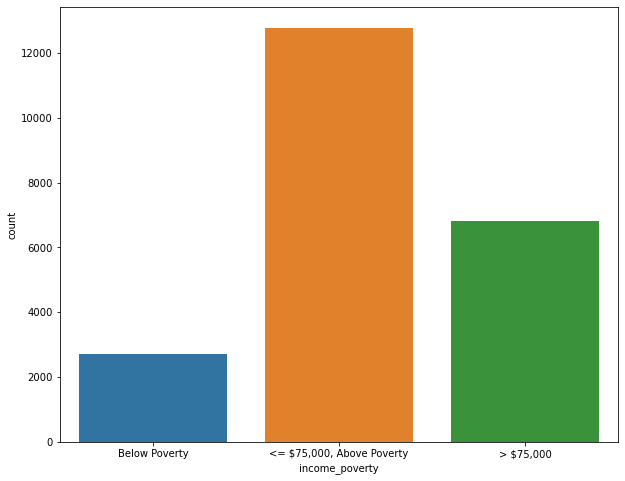

In [34]:
plt.figure(figsize=(10,8))
sns.countplot(data['income_poverty'])
data['income_poverty'].value_counts()

* more respondent's Household annual income was above poverty

# Marital Status of respondents

Married        13555
Not Married    11744
Name: marital_status, dtype: int64

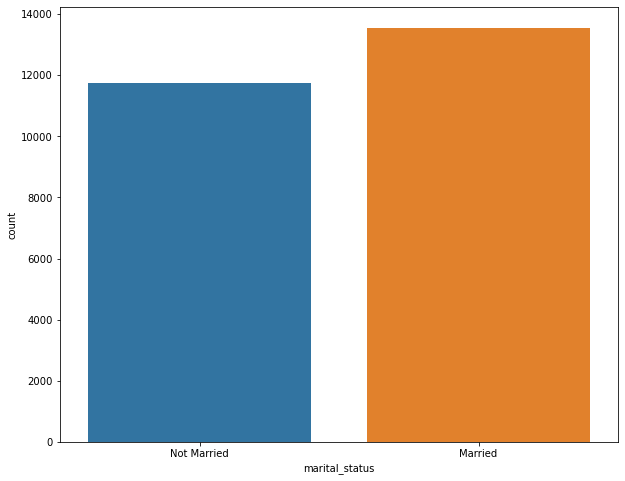

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(data['marital_status'])
data['marital_status'].value_counts()

* Married respondents are little bit more as compare to not married.

# Housing situation of respondent

Own     18736
Rent     5929
Name: rent_or_own, dtype: int64

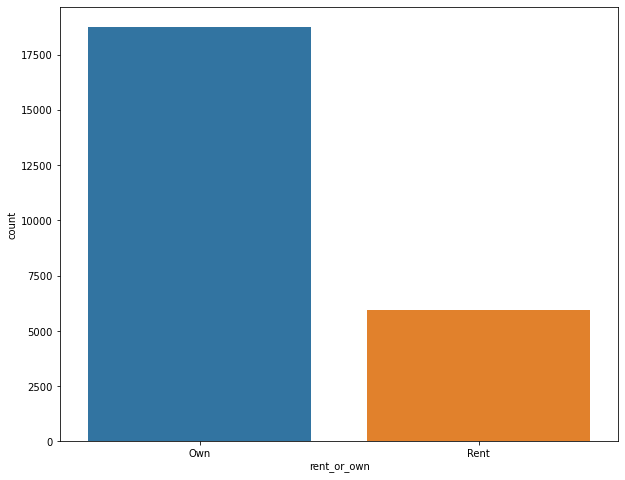

In [36]:
plt.figure(figsize=(10,8))
sns.countplot(data['rent_or_own'])
data['rent_or_own'].value_counts()

* Most of the respondent have their own house

# Employment status of respondent

Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment_status, dtype: int64

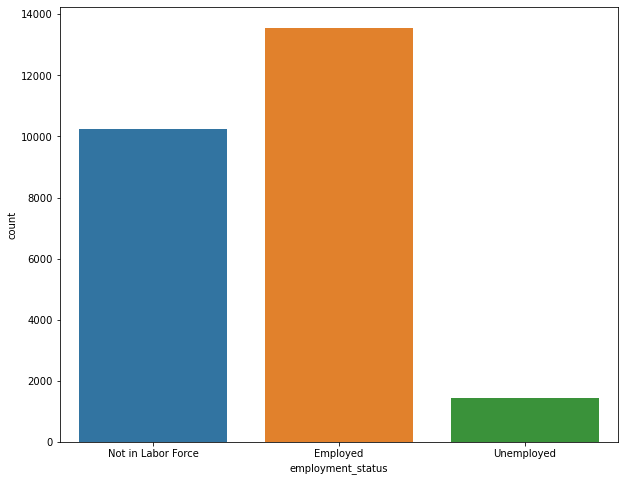

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(data['employment_status'])
data['employment_status'].value_counts()

* most of the respondents are employed

## hhsgeoregion - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.

lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: hhs_geo_region, dtype: int64

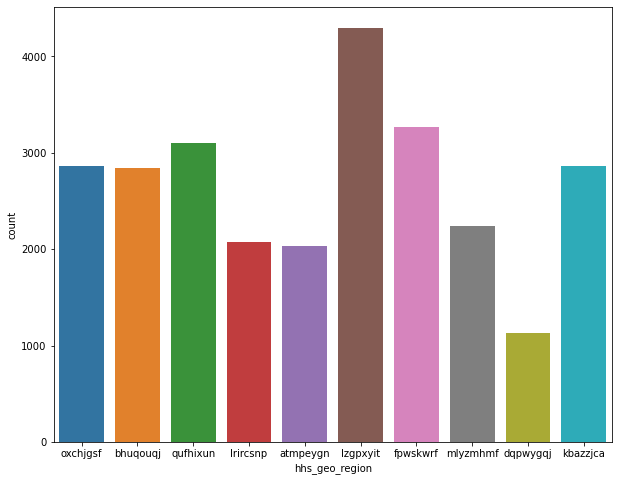

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(data['hhs_geo_region'])
data['hhs_geo_region'].value_counts()

* Respondents residence is high in lzgpxyit region

## census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

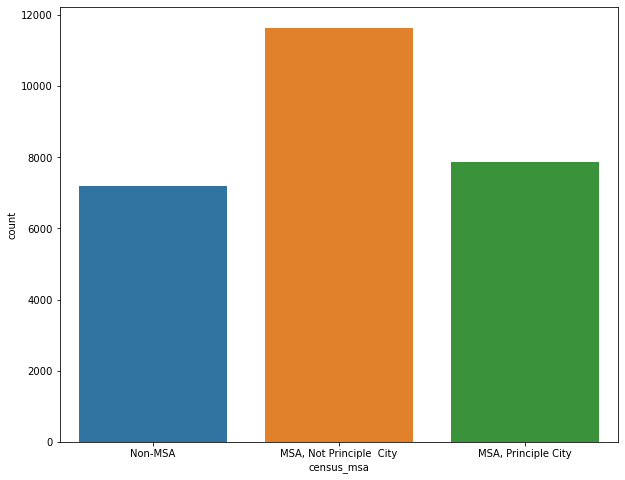

In [39]:
plt.figure(figsize=(10,8))
sns.countplot(data['census_msa'])
data['census_msa'].value_counts()

* Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census is more in MSA(not principle city)

In [40]:
## Number of other adults in household

1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: household_adults, dtype: int64

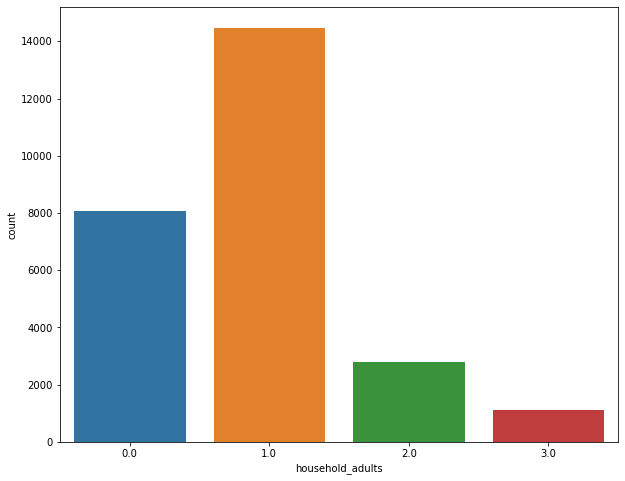

In [41]:
plt.figure(figsize=(10,8))
sns.countplot(data['household_adults'])
data['household_adults'].value_counts()

* Number of  adult households are more in 1

# Number of children in household, top-coded to 3

0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: household_children, dtype: int64

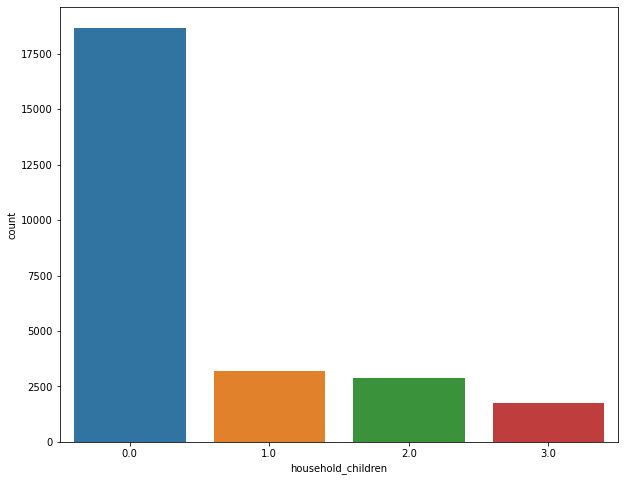

In [42]:
plt.figure(figsize=(10,8))
sns.countplot(data['household_children'])
data['household_children'].value_counts()

* Number of children households are in 0 is more.

# employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.

fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: employment_industry, dtype: int64

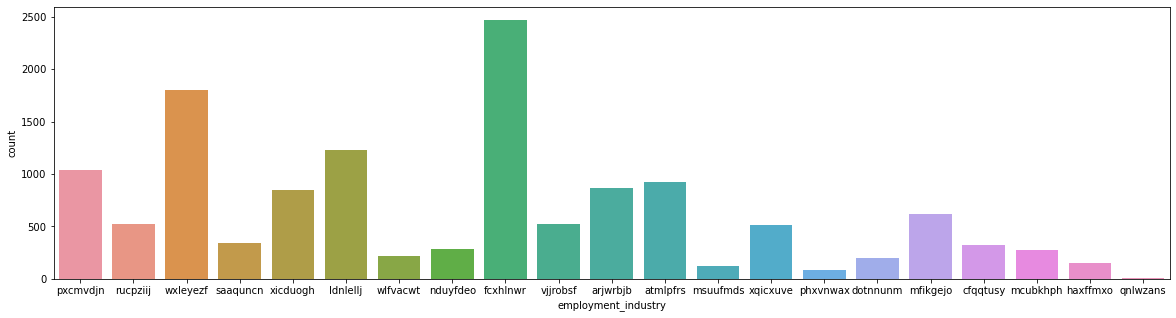

In [43]:
plt.figure(figsize=(20,5))
sns.countplot(data['employment_industry'])
data['employment_industry'].value_counts()

* industry respondent is  more employed in fcxhlnwr

# employment_occupation - Type of occupation of respondent. Values are represented as short random character strings

xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: employment_occupation, dtype: int64

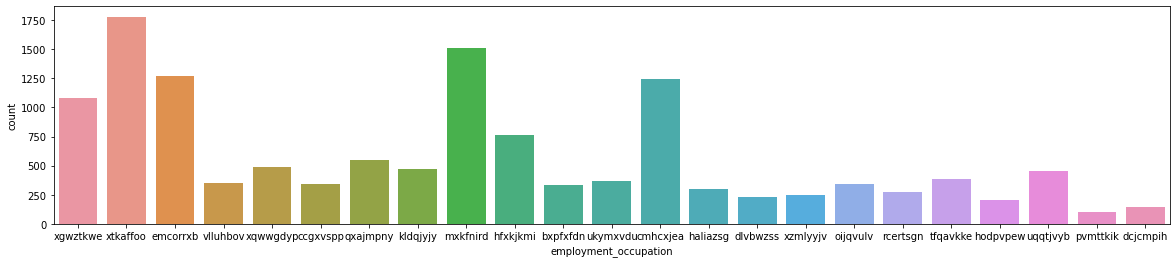

In [44]:
plt.figure(figsize=(20,4))
sns.countplot(data['employment_occupation'])
data['employment_occupation'].value_counts()

* occupation of respondent is more in xtkaffoo

# Respondent received H1N1 flu vaccine

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

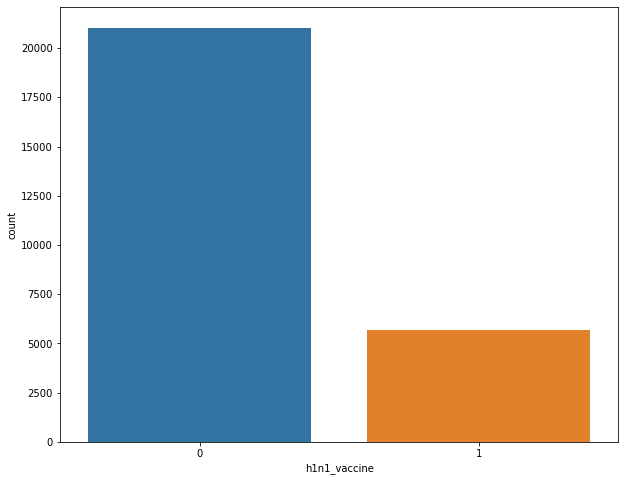

In [45]:
plt.figure(figsize=(10,8))
sns.countplot(data['h1n1_vaccine'])
data['h1n1_vaccine'].value_counts()

* Few respondents received H1N1 flu vaccine

# Bivariate Analysis:

* h1n1_concern - Level of concern about the H1N1 flu.

0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

<AxesSubplot:xlabel='h1n1_concern', ylabel='count'>

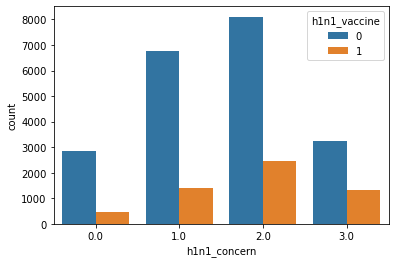

In [46]:
sns.countplot(x='h1n1_concern',hue='h1n1_vaccine',data=data)

* People who are not concern at all have also been vaccinated in small amount and those who are more concerned about h1n1 vaccine those also get vaccinated at little bit more amount.

* But after having concern about h1n1 vaccine more people are not getting h1n1 vaccine.

# h1n1_knowledge - Level of knowledge about H1N1 flu.

0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

<AxesSubplot:xlabel='h1n1_knowledge', ylabel='count'>

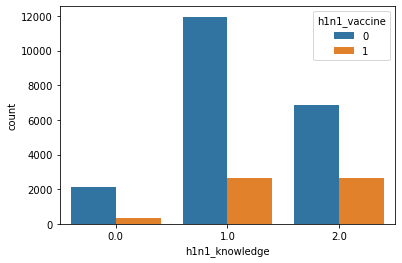

In [47]:
sns.countplot(x='h1n1_knowledge',hue='h1n1_vaccine',data=data)

* People who have no knowledge about h1n1 vaccine those are also getting vaccine.

* People who have a lot of knowledge about h1n1 vaccine those are getting vaccine in large amount.

<AxesSubplot:xlabel='behavioral_antiviral_meds', ylabel='count'>

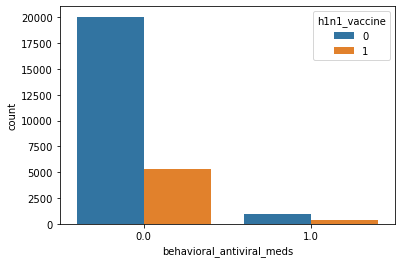

In [48]:
sns.countplot(x='behavioral_antiviral_meds',hue='h1n1_vaccine',data=data)

* many respondents has not taken antiviral medications still few get h1n1_vaccine

* People who are not taking any antiviral medications those are also getting h1n1 vaccine.

<AxesSubplot:xlabel='behavioral_avoidance', ylabel='count'>

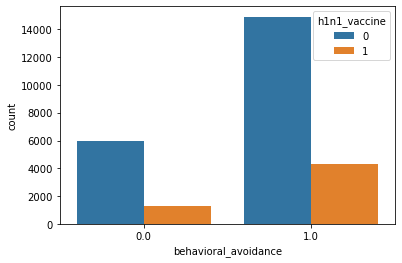

In [49]:
sns.countplot(x='behavioral_avoidance',hue='h1n1_vaccine',data=data)

* Many respondents has avoid close contact others with flu-like symptoms but few of them are get vaccinated.

<AxesSubplot:xlabel='behavioral_face_mask', ylabel='count'>

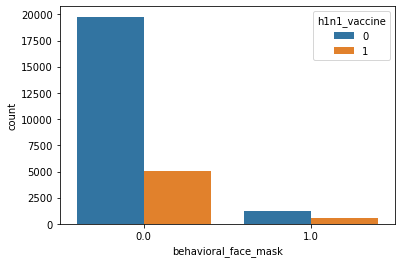

In [50]:
sns.countplot(x='behavioral_face_mask',hue='h1n1_vaccine',data=data)

* A lot of people who didn't bought a face mask but still some get h1n1 vaccine

<AxesSubplot:xlabel='behavioral_wash_hands', ylabel='count'>

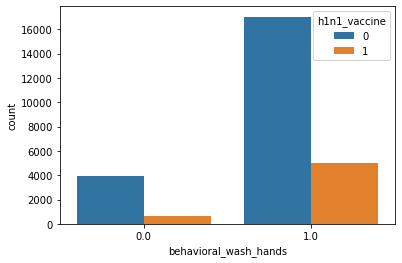

In [51]:
sns.countplot(x='behavioral_wash_hands',hue='h1n1_vaccine',data=data)

* A lot of people has frequently washed hands or use sanitizer and few of them are get h1n1 vaccine.

<AxesSubplot:xlabel='behavioral_large_gatherings', ylabel='count'>

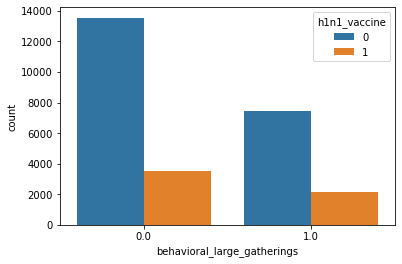

In [52]:
sns.countplot(x='behavioral_large_gatherings',hue='h1n1_vaccine',data=data)

* Many people has not reduce time at large gatherings and more of them are not get vaccinated only few are get h1n1 vaccine.

<AxesSubplot:xlabel='behavioral_outside_home', ylabel='count'>

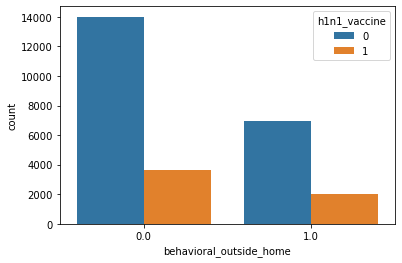

In [53]:
sns.countplot(x='behavioral_outside_home',hue='h1n1_vaccine',data=data)

* few respondents has reduce contact with people outside of own household those also get h1n1 vaccine and those who doesn't reduce contact with people outside of own household they also get vaccine.

<AxesSubplot:xlabel='behavioral_touch_face', ylabel='count'>

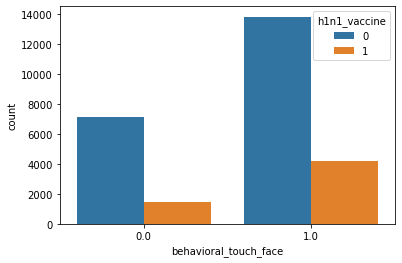

In [54]:
sns.countplot(x='behavioral_touch_face',hue='h1n1_vaccine',data=data)

* Many people has avoid touching face and get vaccine and those are not avoiding they are also getting h1n1 vaccine.

<AxesSubplot:xlabel='doctor_recc_h1n1', ylabel='count'>

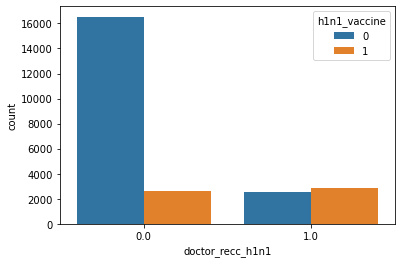

In [55]:
sns.countplot(x='doctor_recc_h1n1',hue='h1n1_vaccine',data=data)

* Most people get vaccination on doctor's recommendation. And those people doctor didn't recommend vaccine they also getting vaccine.

<AxesSubplot:xlabel='chronic_med_condition', ylabel='count'>

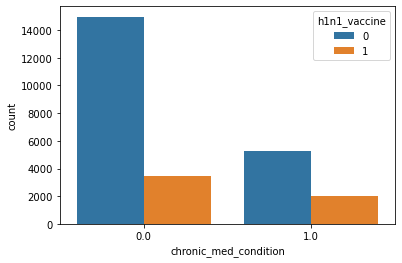

In [56]:
sns.countplot(x='chronic_med_condition',hue='h1n1_vaccine',data=data)

* some have chronic medical conditions those avoided getting vaccination.

* And those who have no chronic medical conditions have received a small amount of vaccine.

<AxesSubplot:xlabel='child_under_6_months', ylabel='count'>

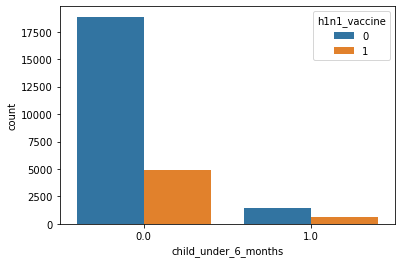

In [57]:
sns.countplot(x='child_under_6_months',hue='h1n1_vaccine',data=data)

* We observe that few respondent's are under 6 months and those also get vaccination.

* And those are above 6 months those also getting vaccination is small amount.

<AxesSubplot:xlabel='health_worker', ylabel='count'>

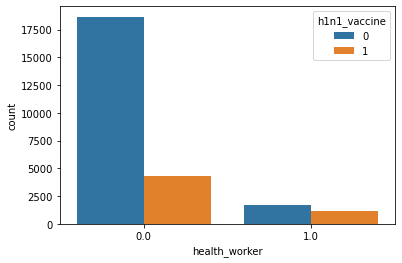

In [58]:
sns.countplot(x='health_worker',hue='h1n1_vaccine',data=data)

* health worker rate will be more of getting h1n1 vaccine as compare to who doesn't health worker. 

<AxesSubplot:xlabel='health_insurance', ylabel='count'>

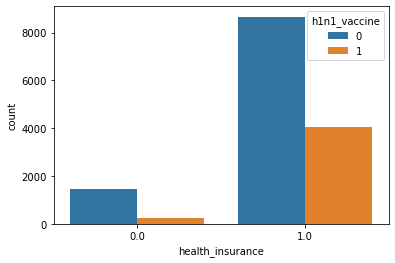

In [59]:
sns.countplot(x='health_insurance',hue='h1n1_vaccine',data=data)

* More people have health insurance and they are getting h1n1 vaccine in large amount.

* And those didn't have health insurance they also getting vaccination.

<AxesSubplot:xlabel='opinion_h1n1_vacc_effective', ylabel='count'>

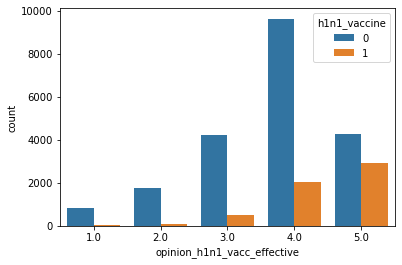

In [60]:
sns.countplot(x='opinion_h1n1_vacc_effective',hue='h1n1_vaccine',data=data)

* More peoples are get vaccine and they say h1n1 vaccine is very effective.

<AxesSubplot:xlabel='opinion_h1n1_risk', ylabel='count'>

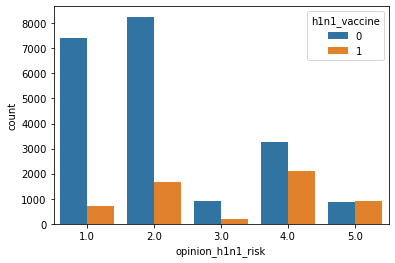

In [61]:
sns.countplot(x='opinion_h1n1_risk',hue='h1n1_vaccine',data=data)

* Respondent's opinion about risk of getting sick H1N1 flu without vaccine is very high and more of them are get vaccinated.

<AxesSubplot:xlabel='opinion_h1n1_sick_from_vacc', ylabel='count'>

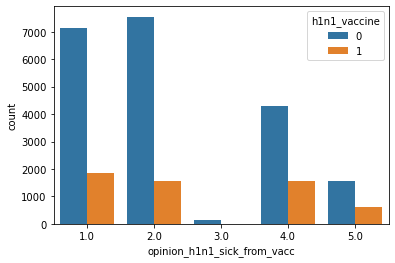

In [62]:
sns.countplot(x='opinion_h1n1_sick_from_vacc',hue='h1n1_vaccine',data=data)

* Respondent's opinion are not at all worried(1) of getting sick from taking h1n1 vaccine. And more peoples are getting vaccination.

<AxesSubplot:xlabel='age_group', ylabel='count'>

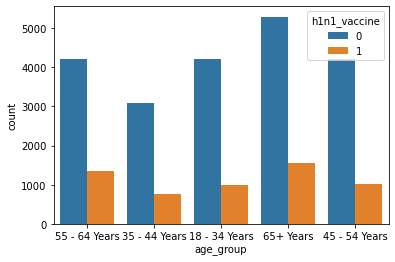

In [63]:
sns.countplot(x='age_group',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='education', ylabel='count'>

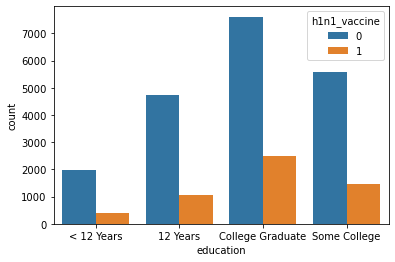

In [64]:
sns.countplot(x='education',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='race', ylabel='count'>

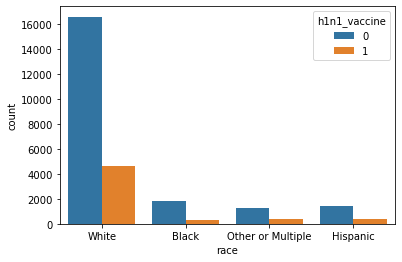

In [65]:
sns.countplot(x='race',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='sex', ylabel='count'>

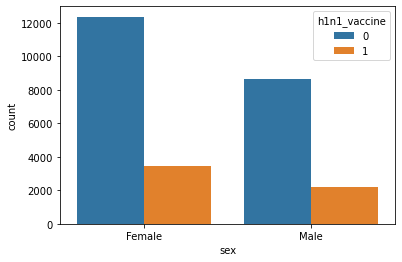

In [66]:
sns.countplot(x='sex',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='income_poverty', ylabel='count'>

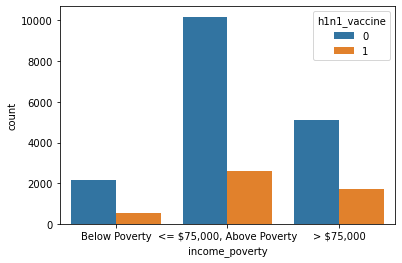

In [67]:
sns.countplot(x='income_poverty',hue='h1n1_vaccine',data=data)

In [ ]:
* 

<AxesSubplot:xlabel='marital_status', ylabel='count'>

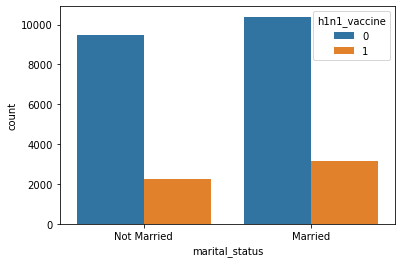

In [68]:
sns.countplot(x='marital_status',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='rent_or_own', ylabel='count'>

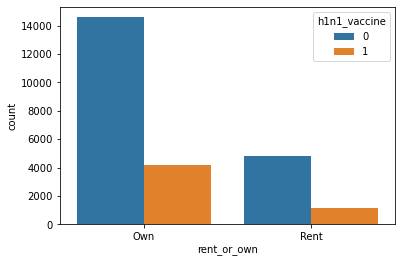

In [69]:
sns.countplot(x='rent_or_own',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='employment_status', ylabel='count'>

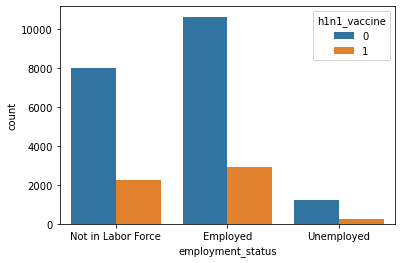

In [70]:
sns.countplot(x='employment_status',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='hhs_geo_region', ylabel='count'>

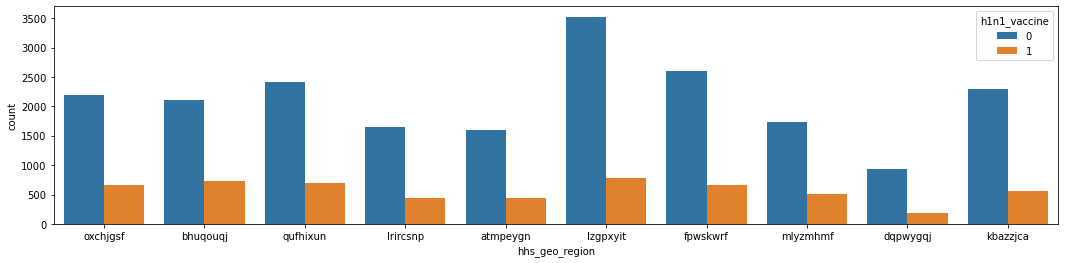

In [71]:
plt.figure(figsize=(18,4))
sns.countplot(x='hhs_geo_region',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='census_msa', ylabel='count'>

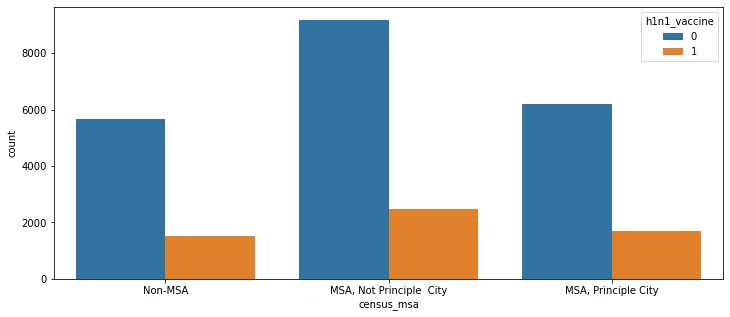

In [72]:
plt.figure(figsize=(12,5))
sns.countplot(x='census_msa',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='household_adults', ylabel='count'>

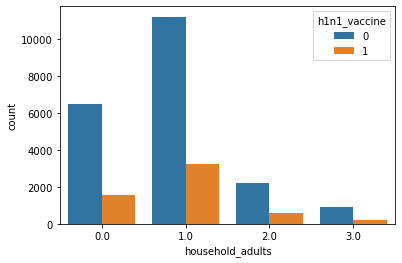

In [73]:
sns.countplot(x='household_adults',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='household_children', ylabel='count'>

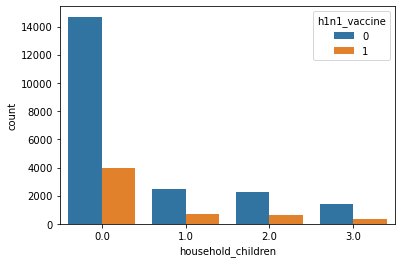

In [74]:
sns.countplot(x='household_children',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='employment_industry', ylabel='count'>

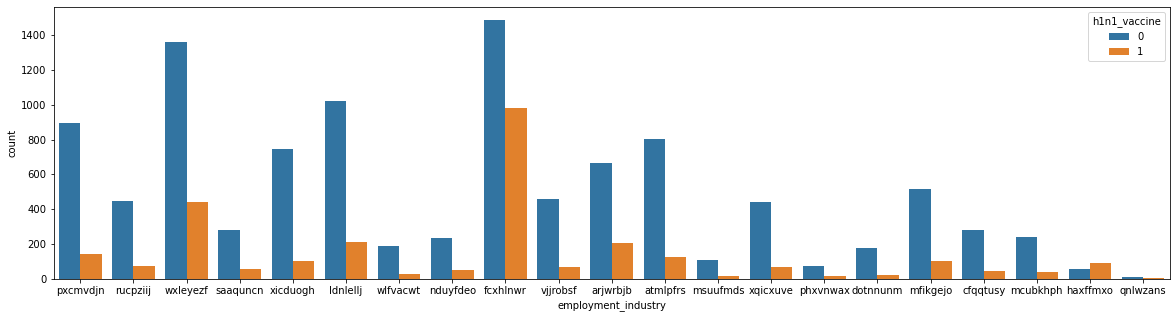

In [75]:
plt.figure(figsize=(20,5))
sns.countplot(x='employment_industry',hue='h1n1_vaccine',data=data)

* In haxffmxo and fcxhlnwr indusrty more peoples are get h1n1 vaccine

* Rate of taking vaccination is vary from industry wise.

<AxesSubplot:xlabel='employment_occupation', ylabel='count'>

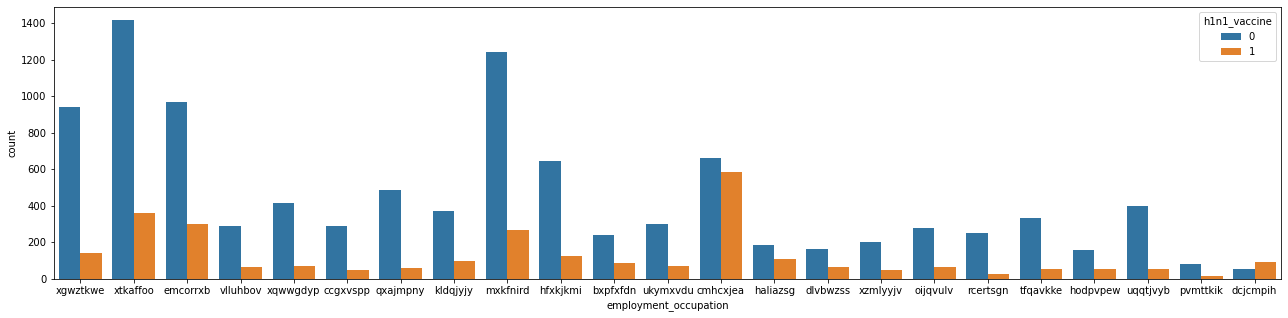

In [76]:
plt.figure(figsize=(22,5))
sns.countplot(x='employment_occupation',hue='h1n1_vaccine',data=data)

* The employee having occupation cmhcxjea, halizsg and dcjcmplh getting more vaccination.

* This means that the rate of getting vaccine changes occupation wise.

# Multivariate Analysis:

<AxesSubplot:xlabel='h1n1_knowledge', ylabel='h1n1_concern'>

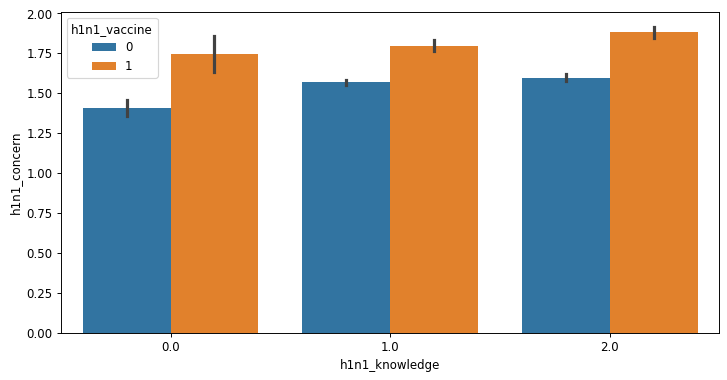

In [77]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='h1n1_knowledge',y='h1n1_concern',hue='h1n1_vaccine',data=data)

* As the knowledge and concern about h1n1 vaccine is increases then people get more vaccine.

<AxesSubplot:xlabel='age_group', ylabel='h1n1_concern'>

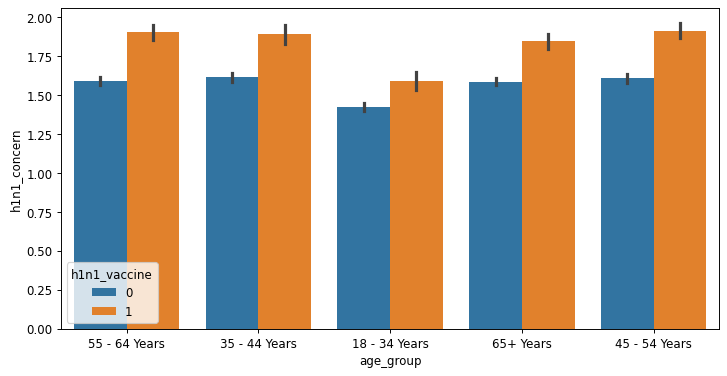

In [78]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='age_group',y='h1n1_concern',hue='h1n1_vaccine',data=data)

* As compare to other age group 18-34 have less concern but they get h1n1 vaccine as well. 

<AxesSubplot:xlabel='employment_occupation', ylabel='h1n1_concern'>

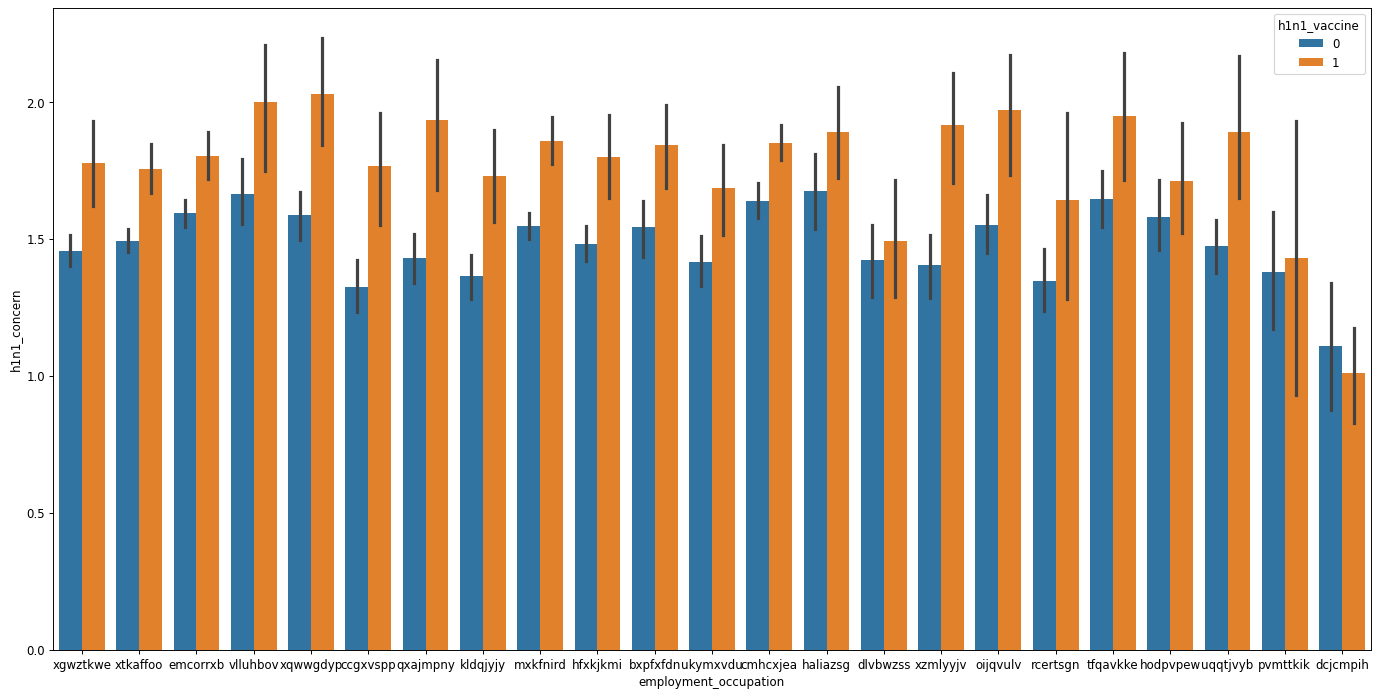

In [79]:
plt.figure(figsize=[20,10],dpi=85)
sns.barplot(x='employment_occupation',y='h1n1_concern',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='behavioral_avoidance', ylabel='h1n1_concern'>

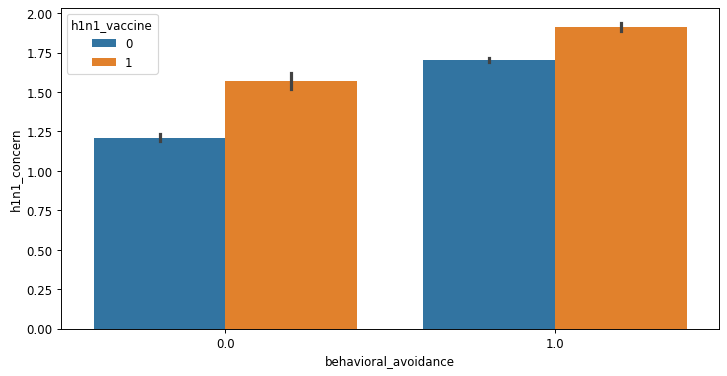

In [80]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='behavioral_avoidance',y='h1n1_concern',hue='h1n1_vaccine',data=data)

Text(0, 0.5, 'h1n1_concern')

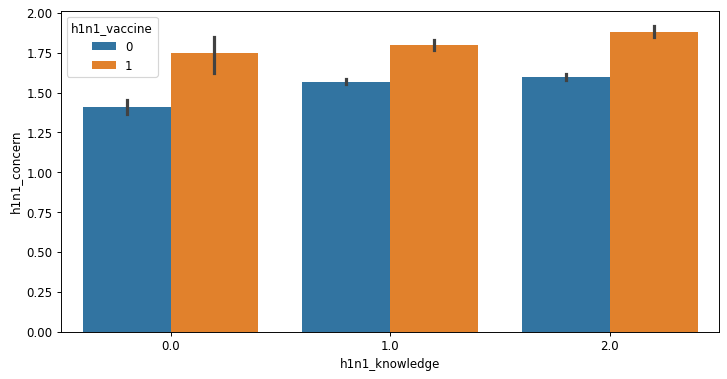

In [81]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='h1n1_knowledge',y='h1n1_concern',hue='h1n1_vaccine',data=data)
plt.ylabel('h1n1_concern')

Text(0, 0.5, 'h1n1_concern')

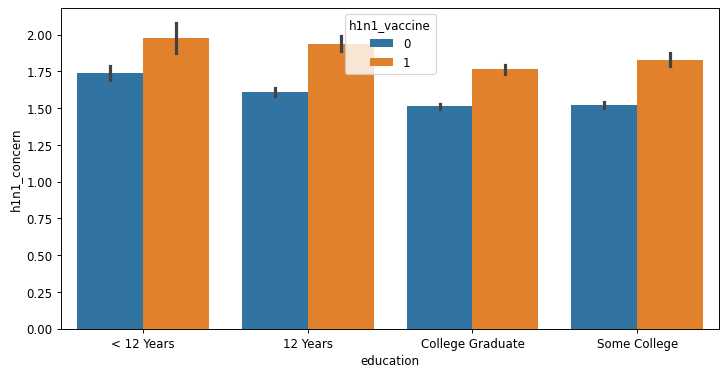

In [82]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='education',y='h1n1_concern',hue='h1n1_vaccine',data=data)
plt.ylabel('h1n1_concern')

Text(0, 0.5, 'h1n1_concern')

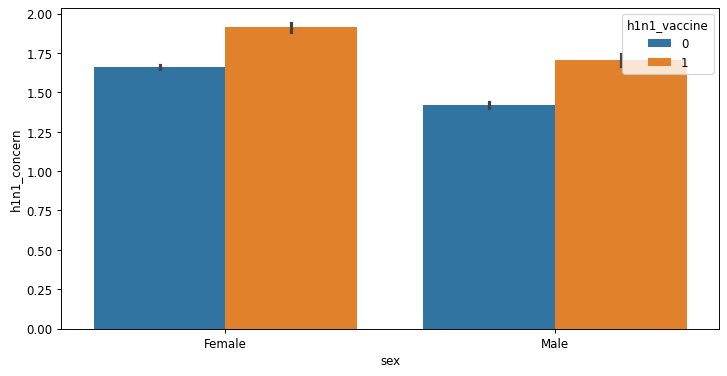

In [83]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='sex',y='h1n1_concern',hue='h1n1_vaccine',data=data)
plt.ylabel('h1n1_concern')

Text(0, 0.5, 'h1n1_concern')

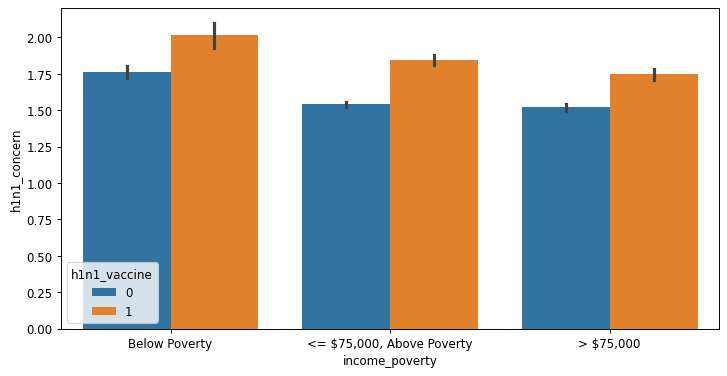

In [84]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='income_poverty',y='h1n1_concern',hue='h1n1_vaccine',data=data)
plt.ylabel('h1n1_concern')

* For all annual income respondent's have concern about h1n1 vaccine and they also get vaccine.

# H1N1 Knowledge:

Text(0, 0.5, 'h1n1_knowledge')

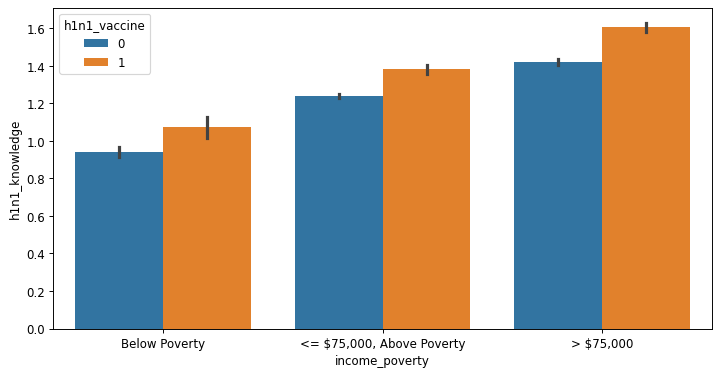

In [85]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='income_poverty',y='h1n1_knowledge',hue='h1n1_vaccine',data=data)
plt.ylabel('h1n1_knowledge')

Text(0, 0.5, 'age_group')

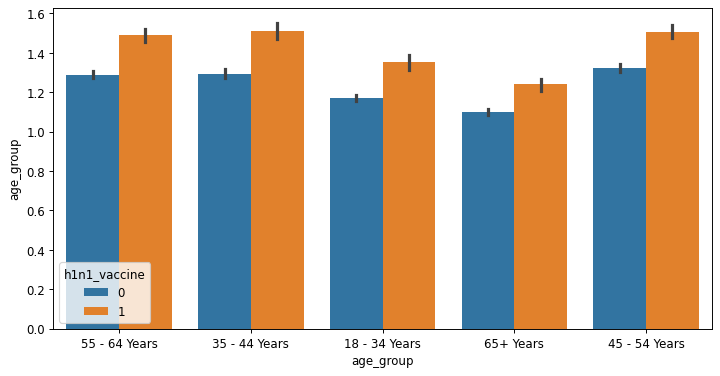

In [86]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='age_group',y='h1n1_knowledge',hue='h1n1_vaccine',data=data)
plt.ylabel('age_group')

Text(0, 0.5, 'employment_occupation')

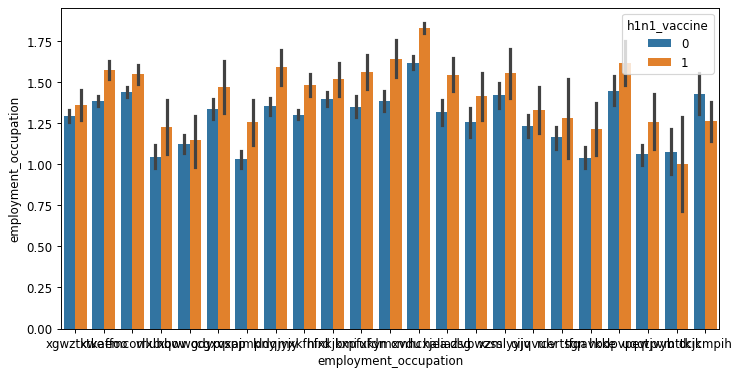

In [87]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='employment_occupation',y='h1n1_knowledge',hue='h1n1_vaccine',data=data)
plt.ylabel('employment_occupation')

Text(0, 0.5, 'h1n1_knowledge')

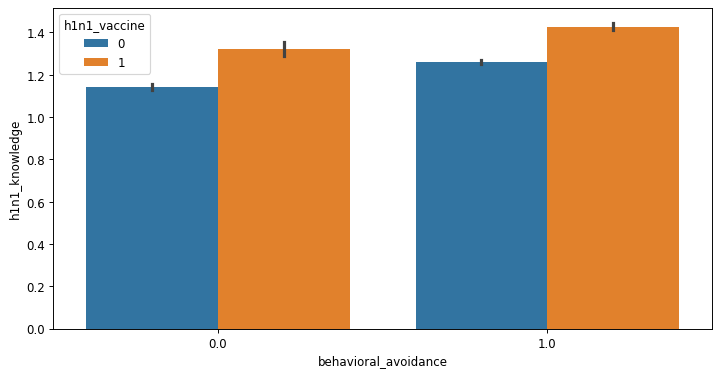

In [88]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='behavioral_avoidance',y='h1n1_knowledge',hue='h1n1_vaccine',data=data)
plt.ylabel('h1n1_knowledge')

Text(0, 0.5, 'h1n1_knowledge')

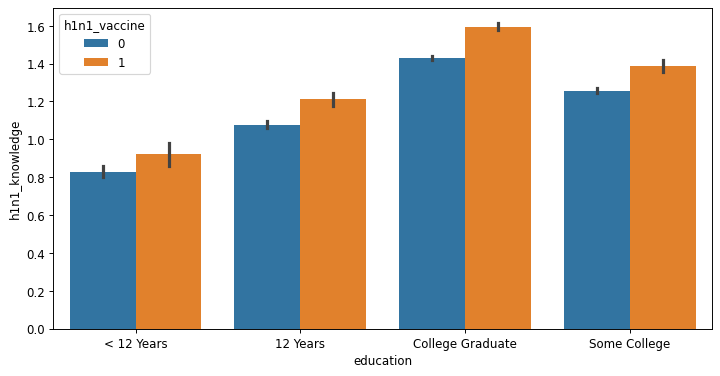

In [89]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='education',y='h1n1_knowledge',hue='h1n1_vaccine',data=data)
plt.ylabel('h1n1_knowledge')

Text(0, 0.5, 'h1n1_knowledge')

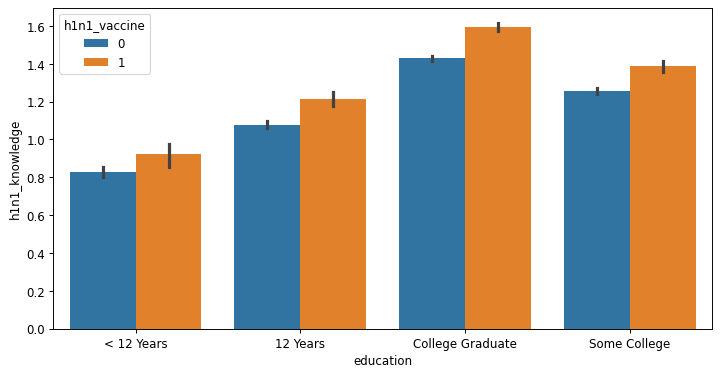

In [90]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='education',y='h1n1_knowledge',hue='h1n1_vaccine',data=data)
plt.ylabel('h1n1_knowledge')

# Violin Plot:

<AxesSubplot:xlabel='sex', ylabel='h1n1_concern'>

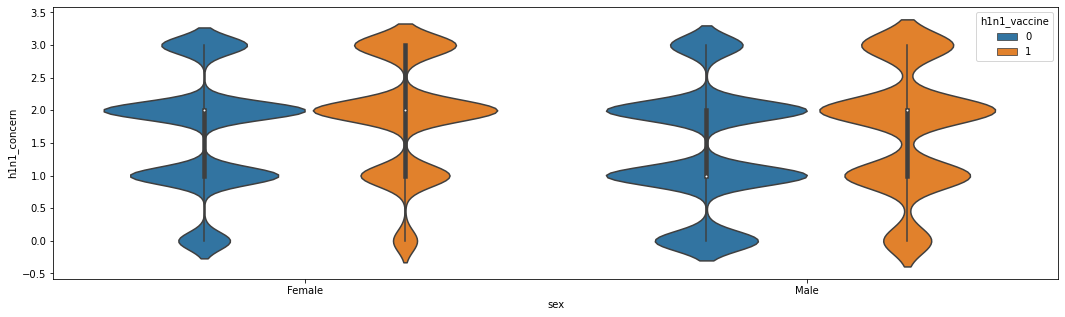

In [91]:
plt.figure(figsize=(18,5))
sns.violinplot(x='sex',y='h1n1_concern',hue='h1n1_vaccine',data=data)

* Although there was no concern(0), males took more vaccines as compare to females.

* At more concern(3) about h1n1 vaccine both male and females take approximate same amount of vaccines.

<AxesSubplot:xlabel='education', ylabel='h1n1_concern'>

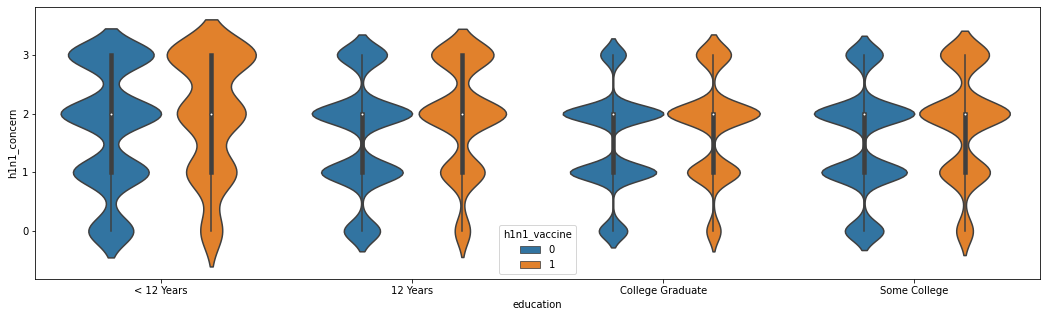

In [92]:
plt.figure(figsize=(18,5))
sns.violinplot(x='education',y='h1n1_concern',hue='h1n1_vaccine',data=data)

* At level of concern 1 nad 2 rate of vaccine for all education is same.

* And at level of concern 3 below 12 years educated peoples get more vaccination as compare to others.

<AxesSubplot:xlabel='employment_occupation', ylabel='h1n1_concern'>

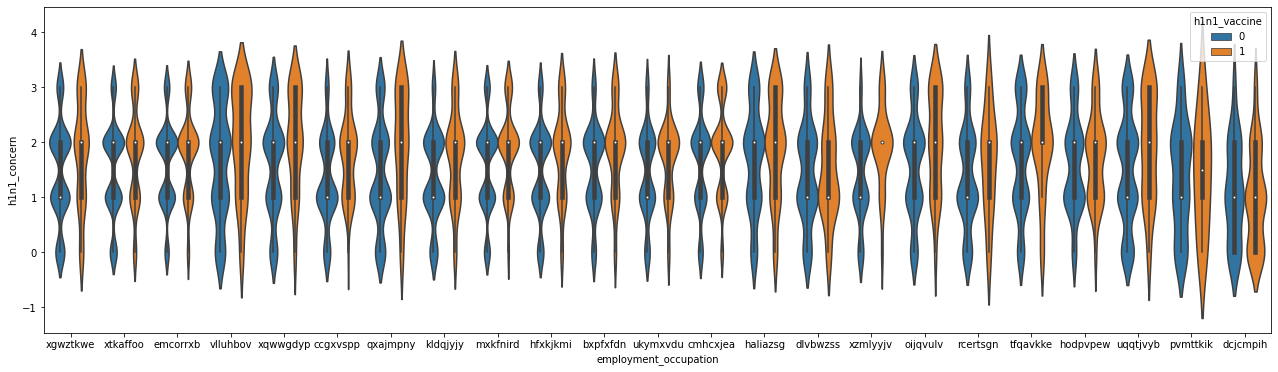

In [93]:
plt.figure(figsize=(22,6))
sns.violinplot(x='employment_occupation',y='h1n1_concern',hue='h1n1_vaccine',data=data)

* Occupation wise level of concern in peoples are differ.

<AxesSubplot:xlabel='age_group', ylabel='h1n1_concern'>

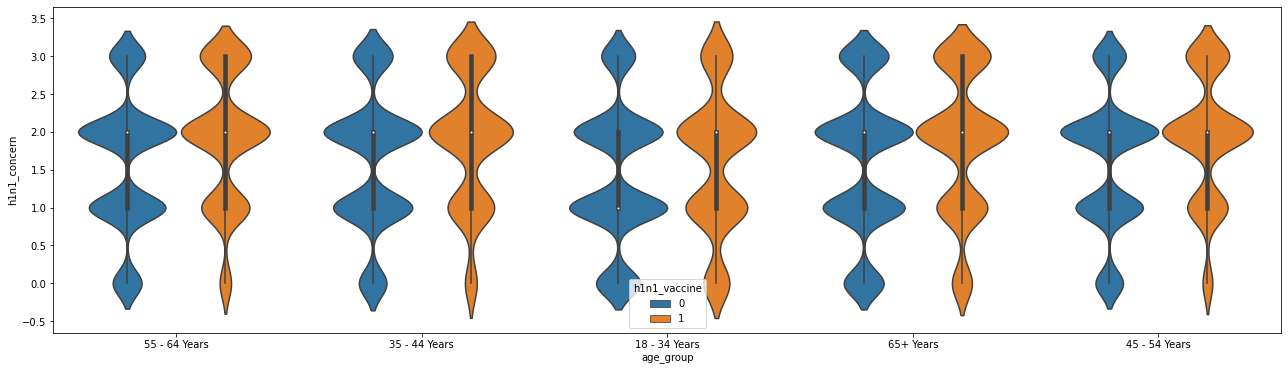

In [94]:
plt.figure(figsize=(22,6))
sns.violinplot(x='age_group',y='h1n1_concern',hue='h1n1_vaccine',data=data)

* All age groups people have almost same concern about vaccine and all  take vaccine as well.

<AxesSubplot:xlabel='income_poverty', ylabel='h1n1_concern'>

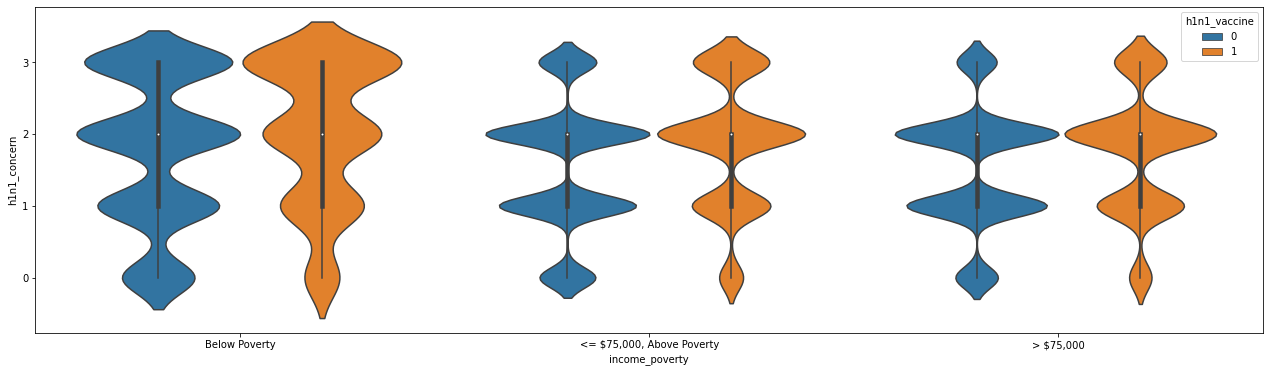

In [95]:
plt.figure(figsize=(22,6))
sns.violinplot(x='income_poverty',y='h1n1_concern',hue='h1n1_vaccine',data=data)

* For all income poverty peoples have concern about h1n1 vaccine and they also get vaccine.

<AxesSubplot:xlabel='marital_status', ylabel='h1n1_concern'>

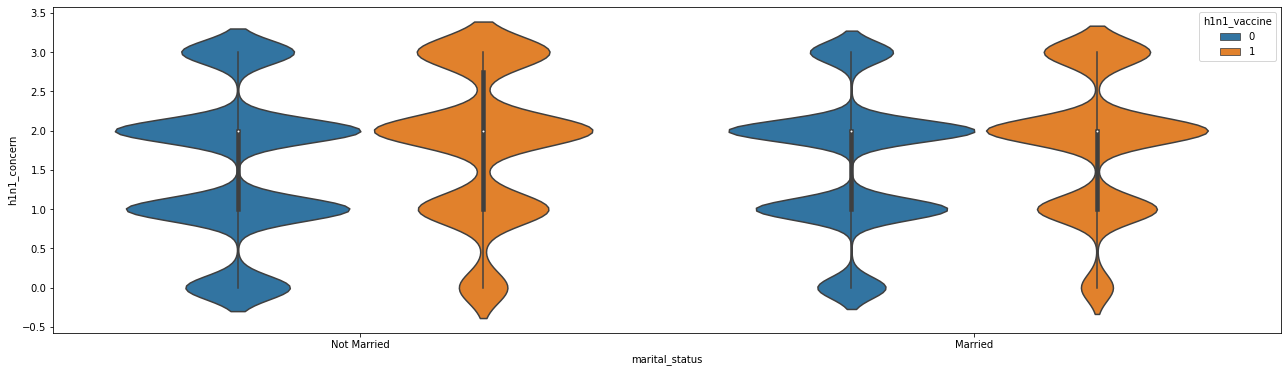

In [96]:
plt.figure(figsize=(22,6))
sns.violinplot(x='marital_status',y='h1n1_concern',hue='h1n1_vaccine',data=data)

* at level of concern 0 more  not married peoples are not get vaccination as compare to married peoples.

* After having more concern about h1n1 vaccine both married and unmarried peoples getting more vaccination.

<AxesSubplot:xlabel='behavioral_wash_hands', ylabel='h1n1_concern'>

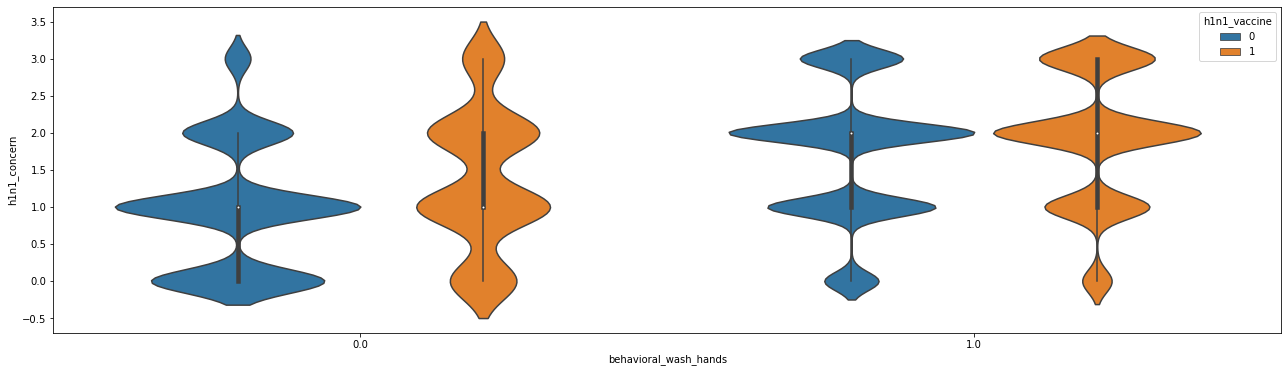

In [97]:
plt.figure(figsize=(22,6))
sns.violinplot(x='behavioral_wash_hands',y='h1n1_concern',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='behavioral_large_gatherings', ylabel='h1n1_concern'>

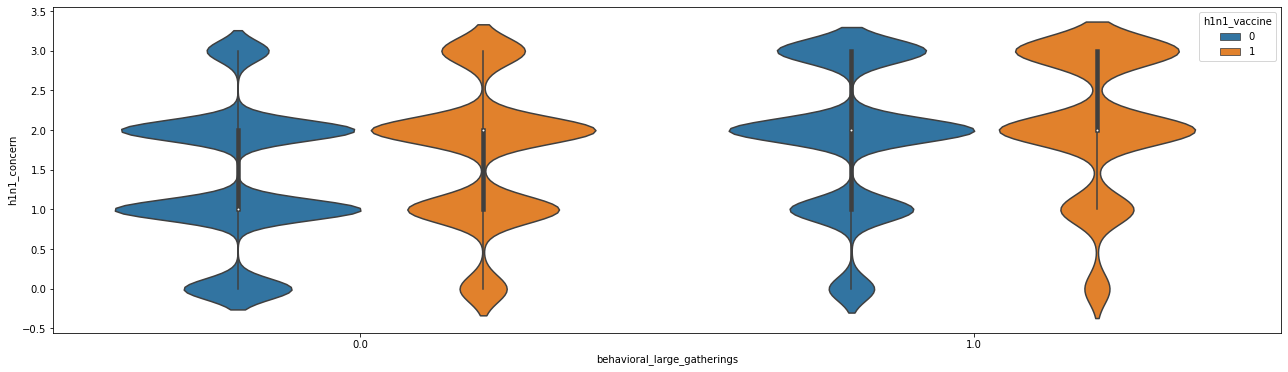

In [98]:
plt.figure(figsize=(22,6))
sns.violinplot(x='behavioral_large_gatherings',y='h1n1_concern',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='behavioral_antiviral_meds', ylabel='h1n1_concern'>

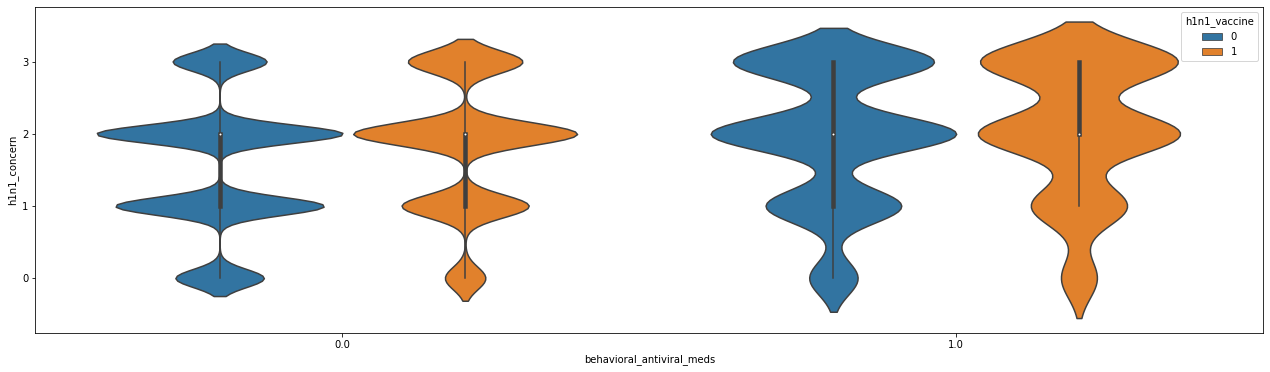

In [99]:
plt.figure(figsize=(22,6))
sns.violinplot(x='behavioral_antiviral_meds',y='h1n1_concern',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='behavioral_avoidance', ylabel='h1n1_concern'>

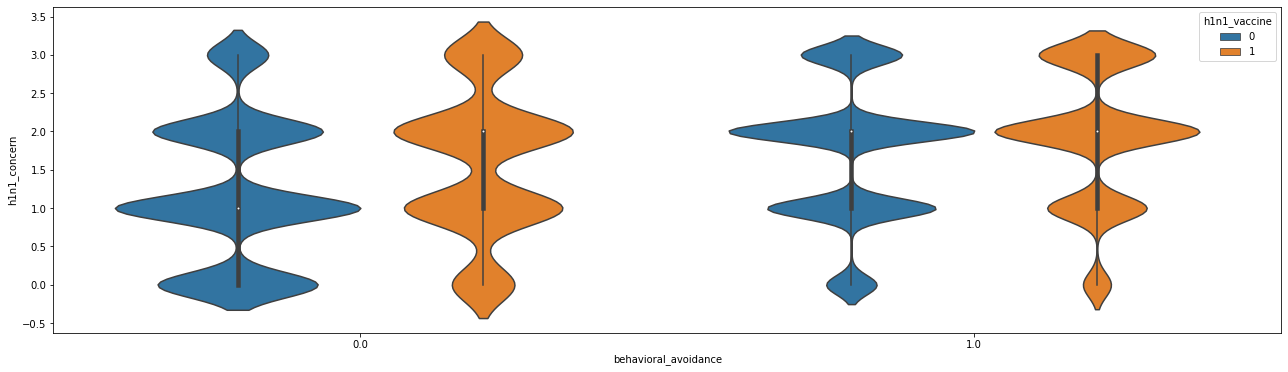

In [100]:
plt.figure(figsize=(22,6))
sns.violinplot(x='behavioral_avoidance',y='h1n1_concern',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='behavioral_face_mask', ylabel='h1n1_concern'>

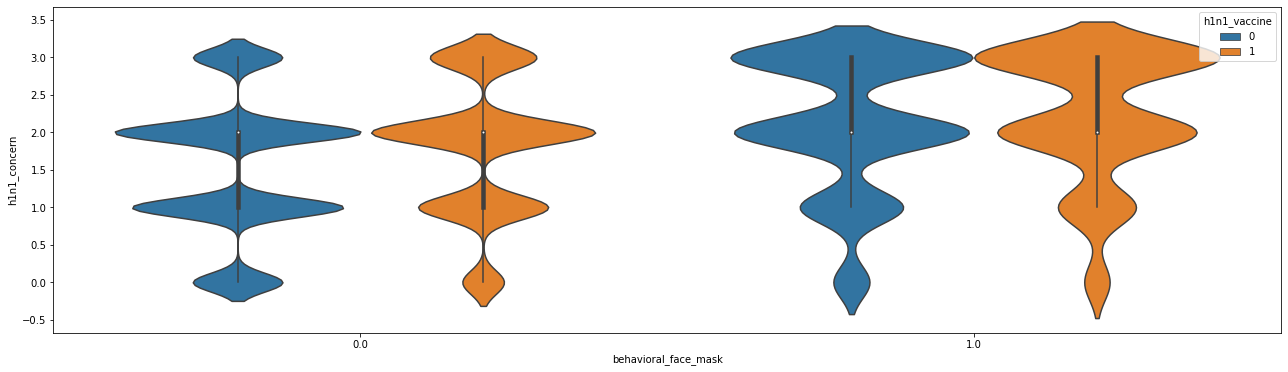

In [101]:
plt.figure(figsize=(22,6))
sns.violinplot(x='behavioral_face_mask',y='h1n1_concern',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='behavioral_outside_home', ylabel='h1n1_concern'>

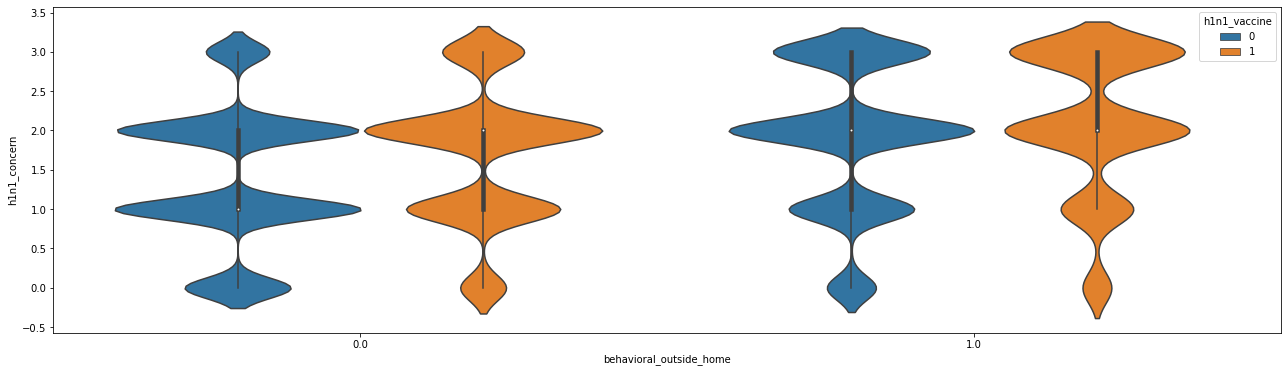

In [102]:
plt.figure(figsize=(22,6))
sns.violinplot(x='behavioral_outside_home',y='h1n1_concern',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='behavioral_touch_face', ylabel='h1n1_concern'>

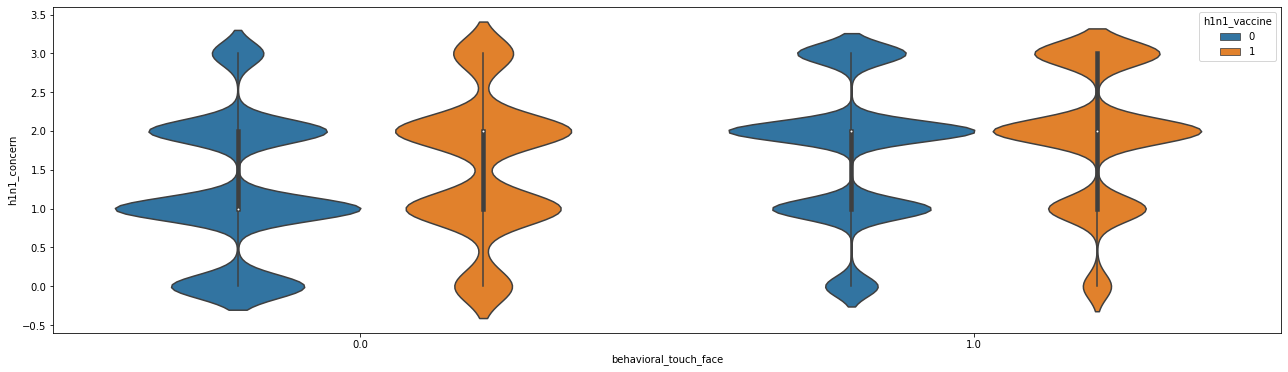

In [103]:
plt.figure(figsize=(22,6))
sns.violinplot(x='behavioral_touch_face',y='h1n1_concern',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='doctor_recc_h1n1', ylabel='h1n1_concern'>

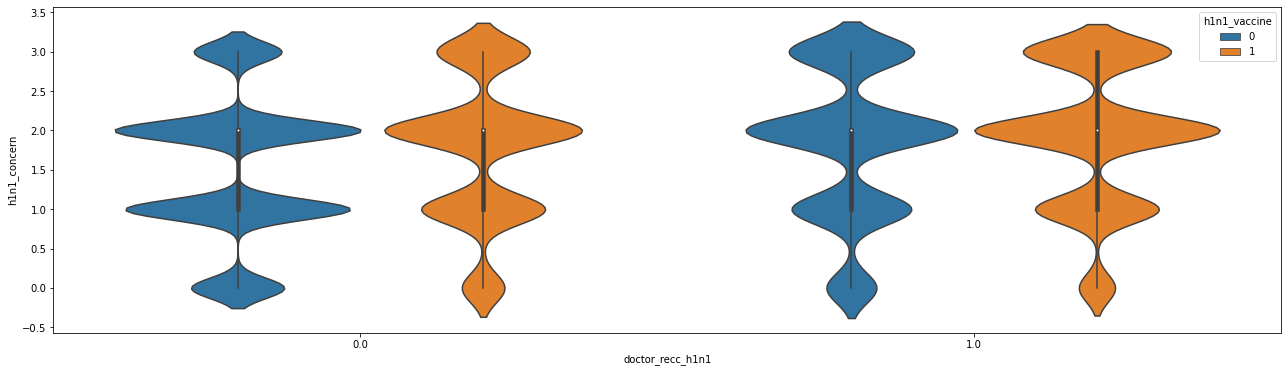

In [104]:
plt.figure(figsize=(22,6))
sns.violinplot(x='doctor_recc_h1n1',y='h1n1_concern',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='chronic_med_condition', ylabel='h1n1_concern'>

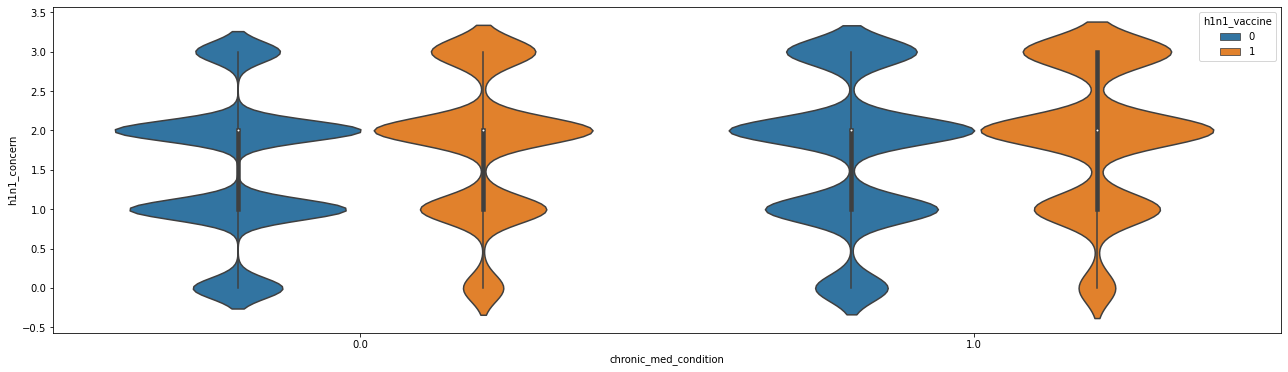

In [105]:
plt.figure(figsize=(22,6))
sns.violinplot(x='chronic_med_condition',y='h1n1_concern',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='child_under_6_months', ylabel='h1n1_concern'>

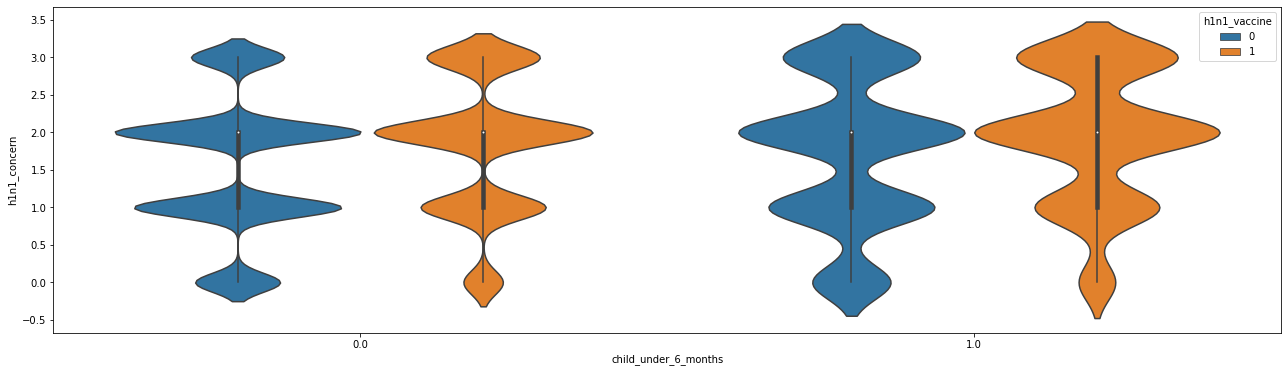

In [106]:
plt.figure(figsize=(22,6))
sns.violinplot(x='child_under_6_months',y='h1n1_concern',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='health_worker', ylabel='h1n1_concern'>

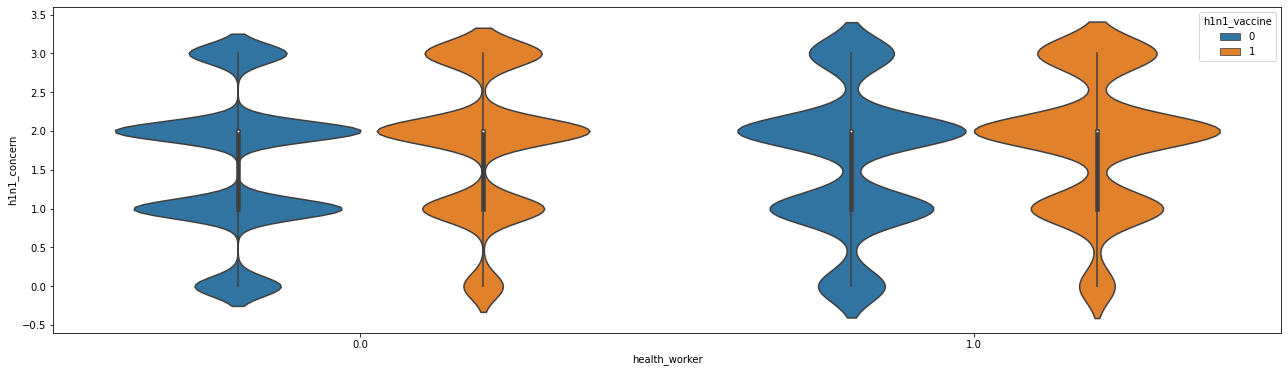

In [107]:
plt.figure(figsize=(22,6))
sns.violinplot(x='health_worker',y='h1n1_concern',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='health_insurance', ylabel='h1n1_concern'>

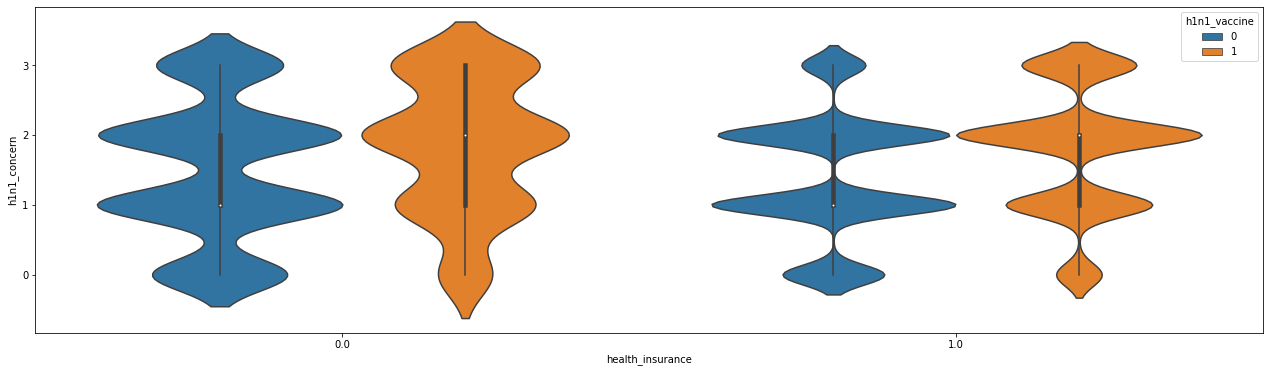

In [108]:
plt.figure(figsize=(22,6))
sns.violinplot(x='health_insurance',y='h1n1_concern',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='opinion_h1n1_vacc_effective', ylabel='h1n1_concern'>

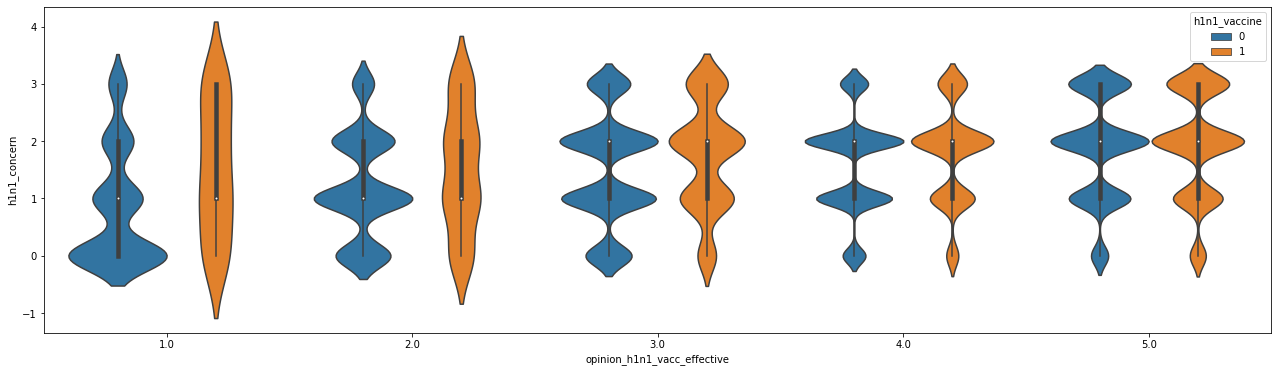

In [109]:
plt.figure(figsize=(22,6))
sns.violinplot(x='opinion_h1n1_vacc_effective',y='h1n1_concern',hue='h1n1_vaccine',data=data)

# Opinion about h1n1 vaccine effectiveness:

<AxesSubplot:xlabel='age_group', ylabel='opinion_h1n1_vacc_effective'>

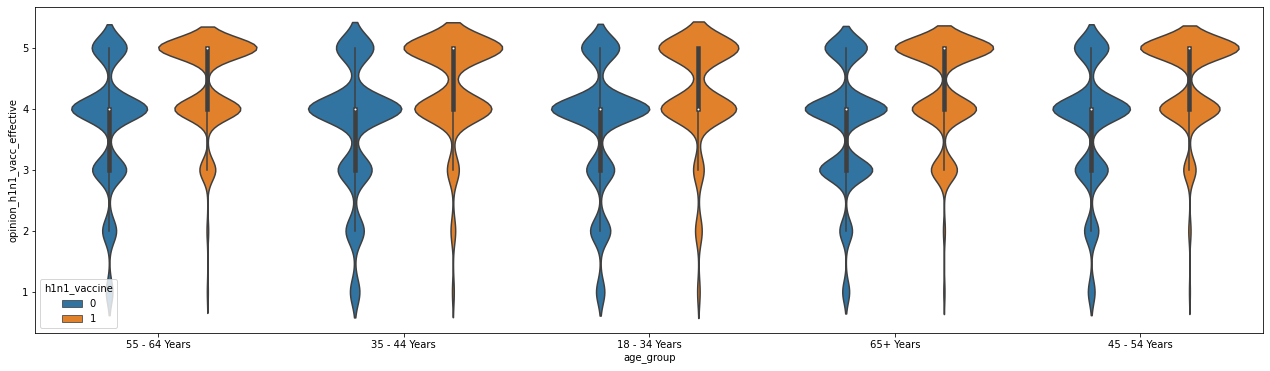

In [110]:
plt.figure(figsize=(22,6))
sns.violinplot(x='age_group',y='opinion_h1n1_vacc_effective',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='education', ylabel='opinion_h1n1_vacc_effective'>

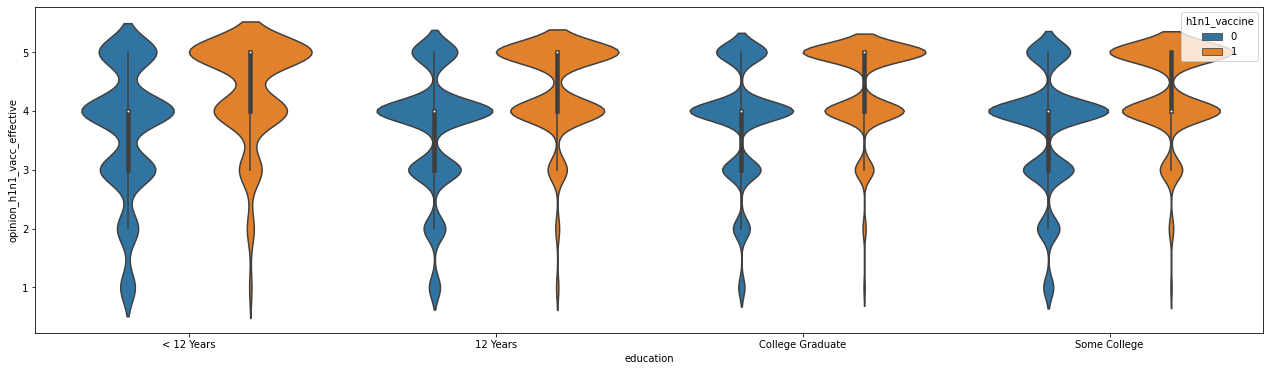

In [111]:
plt.figure(figsize=(22,6))
sns.violinplot(x='education',y='opinion_h1n1_vacc_effective',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='race', ylabel='opinion_h1n1_vacc_effective'>

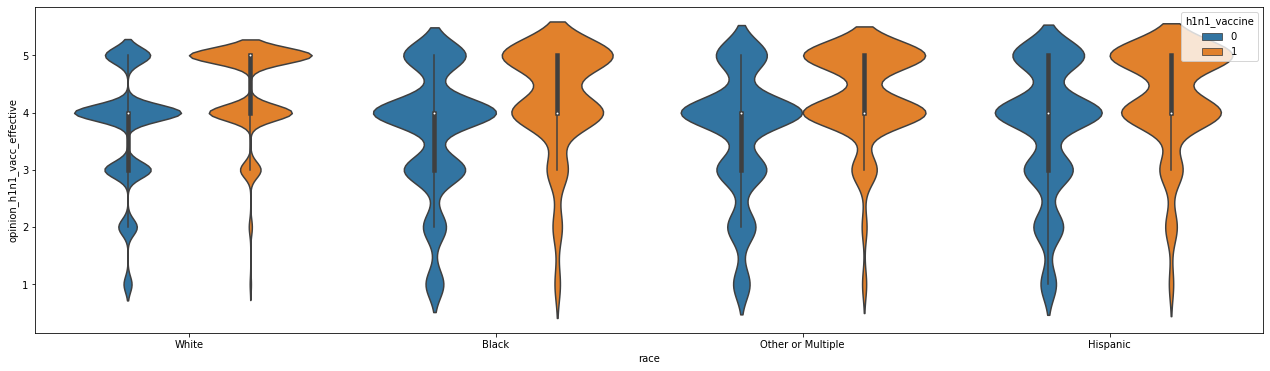

In [112]:
plt.figure(figsize=(22,6))
sns.violinplot(x='race',y='opinion_h1n1_vacc_effective',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='sex', ylabel='opinion_h1n1_vacc_effective'>

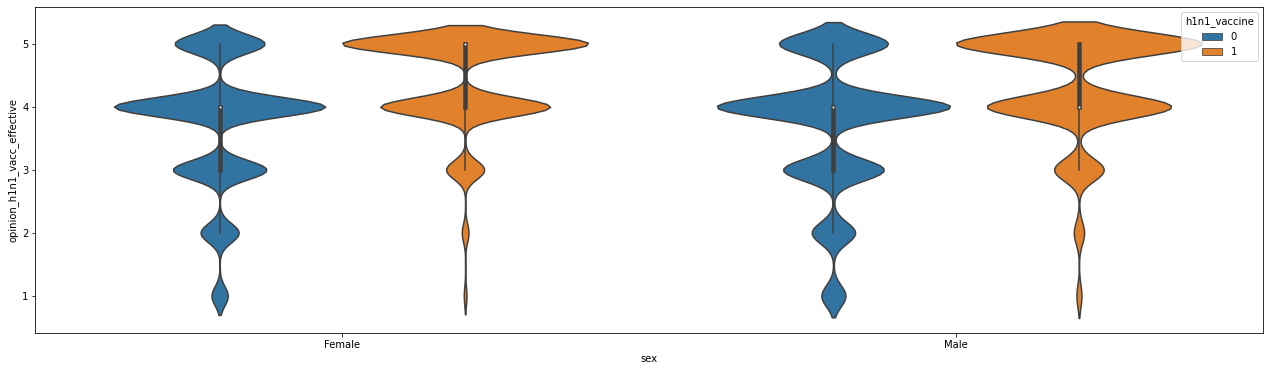

In [113]:
plt.figure(figsize=(22,6))
sns.violinplot(x='sex',y='opinion_h1n1_vacc_effective',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='income_poverty', ylabel='opinion_h1n1_vacc_effective'>

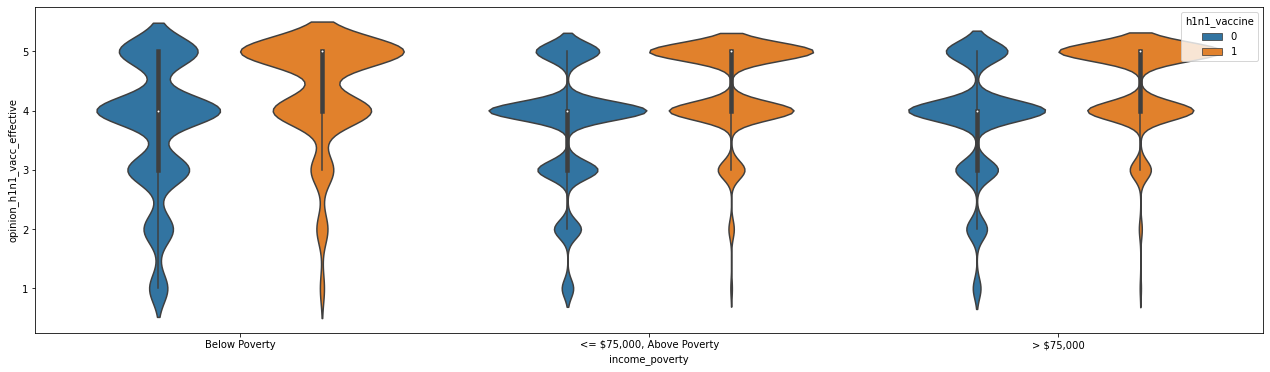

In [114]:
plt.figure(figsize=(22,6))
sns.violinplot(x='income_poverty',y='opinion_h1n1_vacc_effective',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='marital_status', ylabel='opinion_h1n1_vacc_effective'>

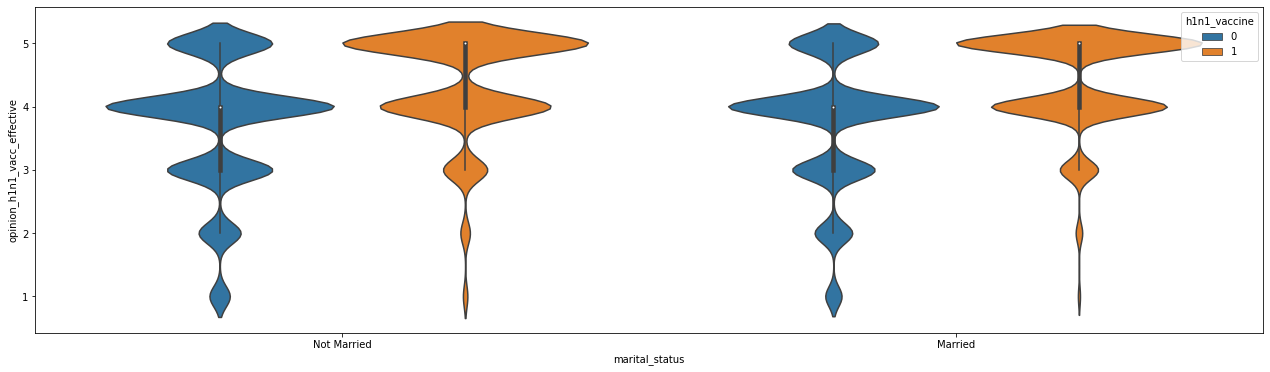

In [115]:
plt.figure(figsize=(22,6))
sns.violinplot(x='marital_status',y='opinion_h1n1_vacc_effective',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='rent_or_own', ylabel='opinion_h1n1_vacc_effective'>

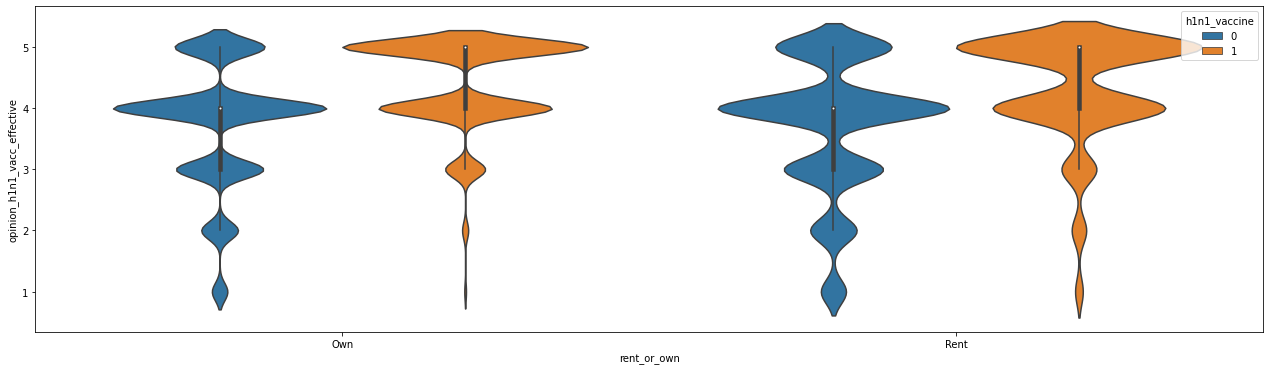

In [116]:
plt.figure(figsize=(22,6))
sns.violinplot(x='rent_or_own',y='opinion_h1n1_vacc_effective',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='employment_status', ylabel='opinion_h1n1_vacc_effective'>

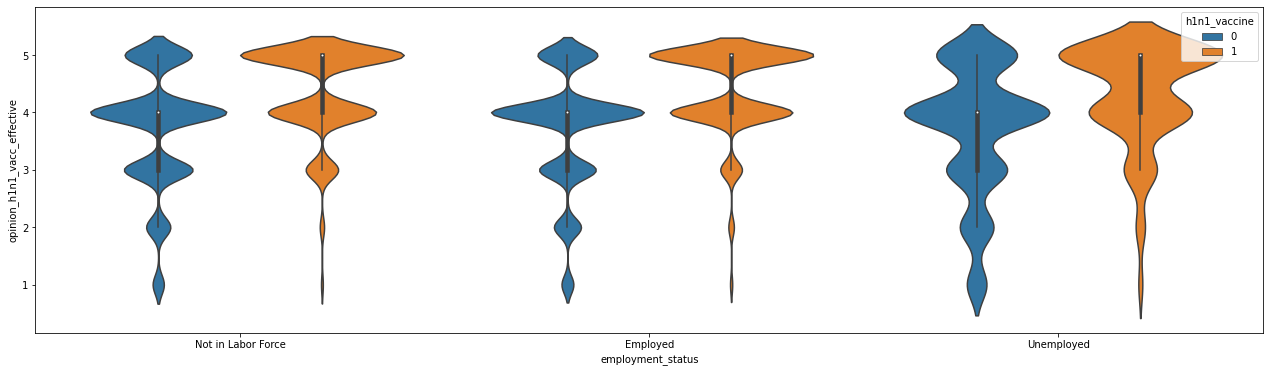

In [117]:
plt.figure(figsize=(22,6))
sns.violinplot(x='employment_status',y='opinion_h1n1_vacc_effective',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='h1n1_concern', ylabel='opinion_h1n1_vacc_effective'>

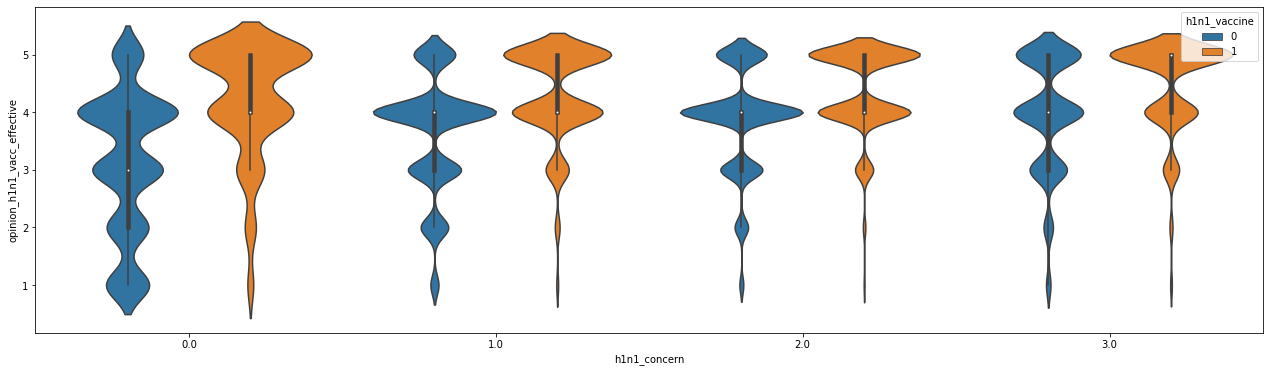

In [118]:
plt.figure(figsize=(22,6))
sns.violinplot(x='h1n1_concern',y='opinion_h1n1_vacc_effective',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='h1n1_knowledge', ylabel='opinion_h1n1_vacc_effective'>

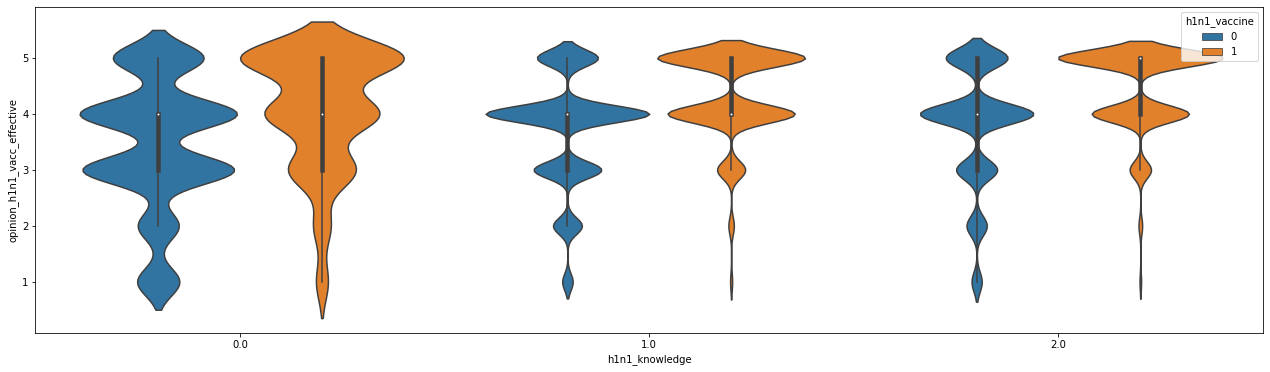

In [119]:
plt.figure(figsize=(22,6))
sns.violinplot(x='h1n1_knowledge',y='opinion_h1n1_vacc_effective',hue='h1n1_vaccine',data=data)

<AxesSubplot:xlabel='age_group', ylabel='opinion_h1n1_vacc_effective'>

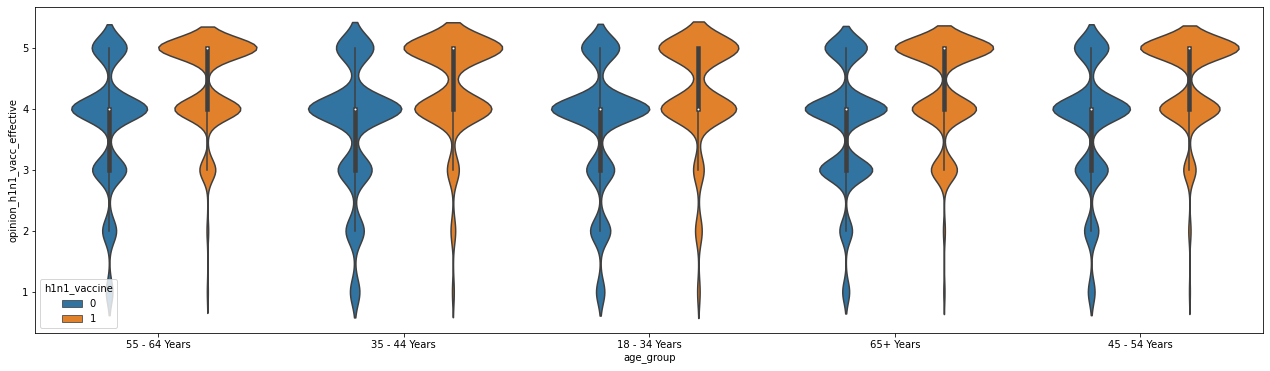

In [120]:
plt.figure(figsize=(22,6))
sns.violinplot(x='age_group',y='opinion_h1n1_vacc_effective',hue='h1n1_vaccine',data=data)

# Heatmap

<AxesSubplot:title={'center':'Correlation of all the Columns'}>

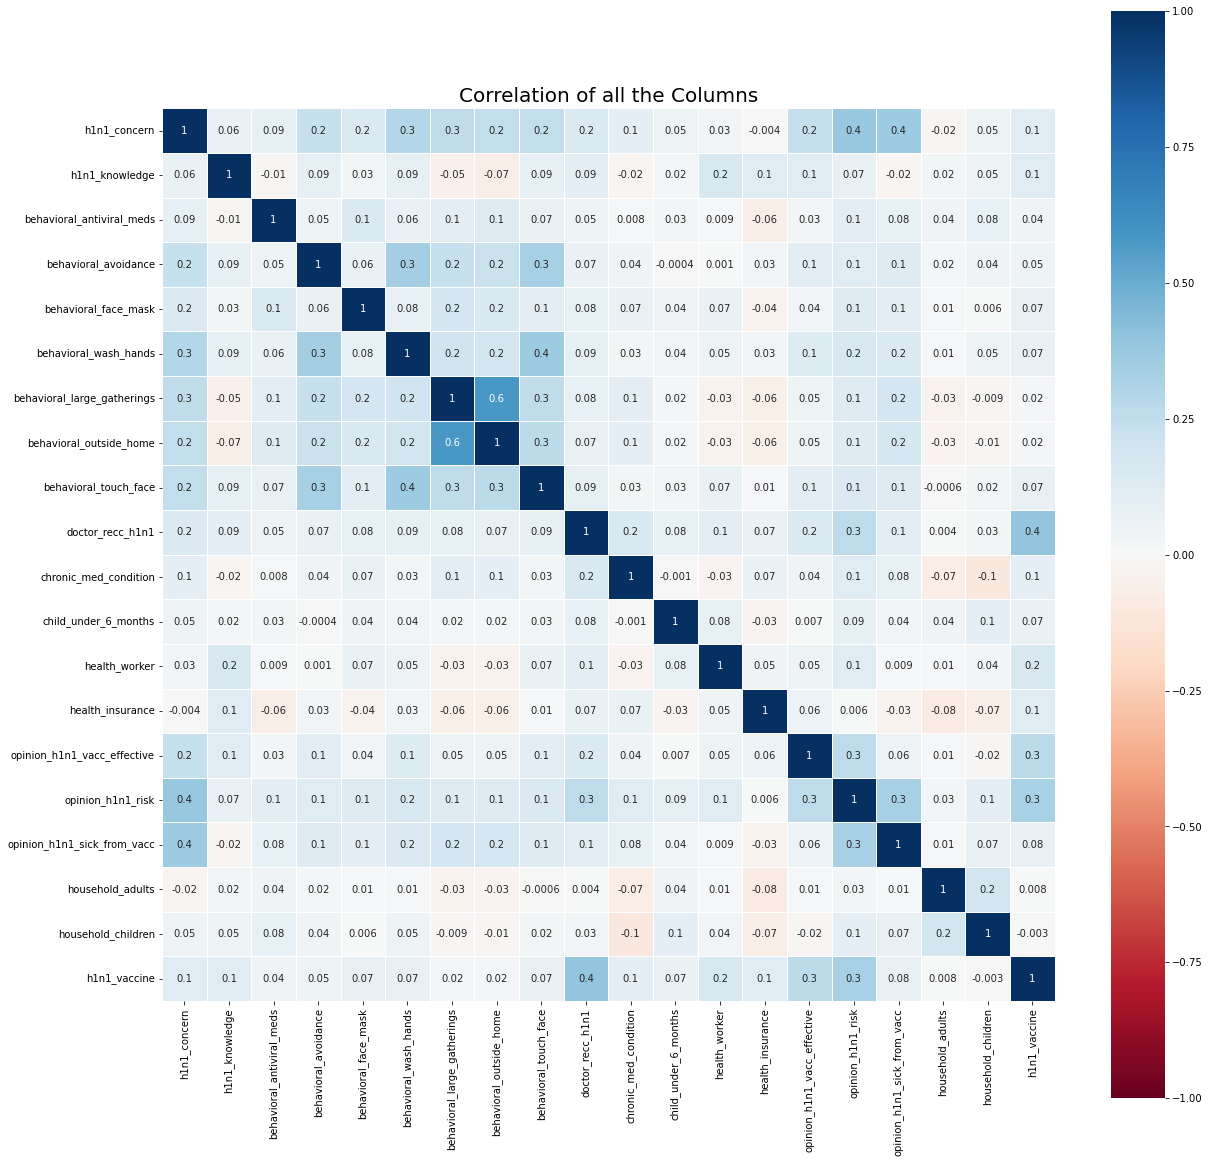

In [121]:
plt.figure(figsize = (20,20))
plt.title('Correlation of all the Columns', fontsize = 20)
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1, center = 0, fmt = '.1g', linewidths = 1, linecolor = 'white', 
            square = True, cmap ='RdBu')

# Impute Missing Values:

In [122]:
data.describe().T

count      mean       std  min  25%  50%  75%  \
h1n1_concern                 26615.0  1.618486  0.910311  0.0  1.0  2.0  2.0   
h1n1_knowledge               26591.0  1.262532  0.618149  0.0  1.0  1.0  2.0   
behavioral_antiviral_meds    26636.0  0.048844  0.215545  0.0  0.0  0.0  0.0   
behavioral_avoidance         26499.0  0.725612  0.446214  0.0  0.0  1.0  1.0   
behavioral_face_mask         26688.0  0.068982  0.253429  0.0  0.0  0.0  0.0   
behavioral_wash_hands        26665.0  0.825614  0.379448  0.0  1.0  1.0  1.0   
behavioral_large_gatherings  26620.0  0.358640  0.479610  0.0  0.0  0.0  1.0   
behavioral_outside_home      26625.0  0.337315  0.472802  0.0  0.0  0.0  1.0   
behavioral_touch_face        26579.0  0.677264  0.467531  0.0  0.0  1.0  1.0   
doctor_recc_h1n1             24547.0  0.220312  0.414466  0.0  0.0  0.0  0.0   
chronic_med_condition        25736.0  0.283261  0.450591  0.0  0.0  0.0  1.0   
child_under_6_months         25887.0  0.082590  0.275266  0.0  0.0  0.0  0.0   
health_worker                25903.0  0.111918  0.315271  0.0  0.0  0.0  0.0   
health_insurance             14433.0  0.879720  0.325300  0.0  1.0  1.0  1.0   
opinion_h1n1_vacc_effective  26316.0  3.850623  1.007436  1.0  3.0  4.0  5.0   
opinion_h1n1_risk            26319.0  2.342566  1.285539  1.0  1.0  2.0  4.0   
opinion_h1n1_sick_from_vacc  26312.0  2.357670  1.362766  1.0  1.0  2.0  4.0   
household_adults             26458.0  0.886499  0.753422  0.0  0.0  1.0  1.0   
household_children           26458.0  0.534583  0.928173  0.0  0.0  0.0  1.0   
h1n1_vaccine                 26707.0  0.212454  0.409052  0.0  0.0  0.0  0.0   

                             max  
h1n1_concern                 3.0  
h1n1_knowledge               2.0  
behavioral_antiviral_meds    1.0  
behavioral_avoidance         1.0  
behavioral_face_mask         1.0  
behavioral_wash_hands        1.0  
behavioral_large_gatherings  1.0  
behavioral_outside_home      1.0  
behavioral_touch_face        1.0  
doctor_recc_h1n1             1.0  
chronic_med_condition        1.0  
child_under_6_months         1.0  
health_worker                1.0  
health_insurance             1.0  
opinion_h1n1_vacc_effective  5.0  
opinion_h1n1_risk            5.0  
opinion_h1n1_sick_from_vacc  5.0  
household_adults             3.0  
household_children           3.0  
h1n1_vaccine                 1.0

In [123]:
data.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
hhs_geo_region                     0
census_msa                         0
h

In [124]:
columns=['h1n1_concern','h1n1_knowledge','behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face','doctor_recc_h1n1','chronic_med_condition','child_under_6_months','health_worker','health_insurance','opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','education','income_poverty','marital_status','rent_or_own','employment_status','household_adults','household_children']

In [125]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [126]:
data[columns]=imputer.fit_transform(data[columns])

In [127]:
data[columns].head()

h1n1_concern h1n1_knowledge behavioral_antiviral_meds behavioral_avoidance  \
0          1.0            0.0                       0.0                  0.0   
1          3.0            2.0                       0.0                  1.0   
2          1.0            1.0                       0.0                  1.0   
3          1.0            1.0                       0.0                  1.0   
4          2.0            1.0                       0.0                  1.0   

  behavioral_face_mask behavioral_wash_hands behavioral_large_gatherings  \
0                  0.0                   0.0                         0.0   
1                  0.0                   1.0                         0.0   
2                  0.0                   0.0                         0.0   
3                  0.0                   1.0                         1.0   
4                  0.0                   1.0                         1.0   

  behavioral_outside_home behavioral_touch_face doctor_recc_h1n1  ...  \
0                     1.0                   1.0              0.0  ...   
1                     1.0                   1.0              0.0  ...   
2                     0.0                   0.0              0.0  ...   
3                     0.0                   0.0              0.0  ...   
4                     0.0                   1.0              0.0  ...   

  opinion_h1n1_vacc_effective opinion_h1n1_risk opinion_h1n1_sick_from_vacc  \
0                         3.0               1.0                         2.0   
1                         5.0               4.0                         4.0   
2                         3.0               1.0                         1.0   
3                         3.0               3.0                         5.0   
4                         3.0               3.0                         2.0   

          education             income_poverty marital_status rent_or_own  \
0        < 12 Years              Below Poverty    Not Married         Own   
1          12 Years              Below Poverty    Not Married        Rent   
2  College Graduate  <= $75,000, Above Poverty    Not Married         Own   
3          12 Years              Below Poverty    Not Married        Rent   
4      Some College  <= $75,000, Above Poverty        Married         Own   

    employment_status household_adults household_children  
0  Not in Labor Force              0.0                0.0  
1            Employed              0.0                0.0  
2            Employed              2.0                0.0  
3  Not in Labor Force              0.0                0.0  
4            Employed              1.0                0.0  

[5 rows x 24 columns]

# One hot encoding:

In [128]:
col_list = ['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa','employment_industry','employment_occupation']

for col in col_list:
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes

data.head()

h1n1_concern h1n1_knowledge behavioral_antiviral_meds behavioral_avoidance  \
0          1.0            0.0                       0.0                  0.0   
1          3.0            2.0                       0.0                  1.0   
2          1.0            1.0                       0.0                  1.0   
3          1.0            1.0                       0.0                  1.0   
4          2.0            1.0                       0.0                  1.0   

  behavioral_face_mask behavioral_wash_hands behavioral_large_gatherings  \
0                  0.0                   0.0                         0.0   
1                  0.0                   1.0                         0.0   
2                  0.0                   0.0                         0.0   
3                  0.0                   1.0                         1.0   
4                  0.0                   1.0                         1.0   

  behavioral_outside_home behavioral_touch_face doctor_recc_h1n1  ...  \
0                     1.0                   1.0              0.0  ...   
1                     1.0                   1.0              0.0  ...   
2                     0.0                   0.0              0.0  ...   
3                     0.0                   0.0              0.0  ...   
4                     0.0                   1.0              0.0  ...   

  marital_status rent_or_own employment_status hhs_geo_region census_msa  \
0              1           0                 1              8          2   
1              1           1                 0              1          0   
2              1           0                 0              9          0   
3              1           1                 1              5          1   
4              0           0                 0              9          0   

  household_adults household_children  employment_industry  \
0              0.0                0.0                   -1   
1              0.0                0.0                   12   
2              2.0                0.0                   14   
3              0.0                0.0                   -1   
4              1.0                0.0                   18   

   employment_occupation  h1n1_vaccine  
0                     -1             0  
1                     19             0  
2                     21             0  
3                     -1             0  
4                      5             0  

[5 rows x 32 columns]

# Pre processing data:

In [129]:
X = data.drop(columns = ['h1n1_vaccine'])
y = data['h1n1_vaccine']

In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size = 0.3, random_state = 42)

In [131]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(18694, 31)
(18694,)
(8013, 31)
(8013,)


In [132]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)

# 1) Logistic Regression:

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [134]:
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_test, y_test))

Training accuracy : 0.8358831710709318
Testing accuracy  : 0.8340197179583178


# 2) Decision Tree Classifier:

In [135]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [136]:
y_pred_dtc_train = dtc.predict(x_train)
y_pred_dtc_test  = dtc.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_dtc_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_dtc_test, y_test))

Training accuracy : 0.9998930138012196
Testing accuracy  : 0.7501559965056783


# 3) SVC

In [137]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [138]:
y_pred_svm_train = svm.predict(x_train)
y_pred_svm_test  = svm.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_svm_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_svm_test, y_test))

Training accuracy : 0.8511287043971327
Testing accuracy  : 0.8341445151628604


# 4) Ada Boost Classifier:

In [139]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier()
model3.fit(x_train, y_train)

AdaBoostClassifier()

In [140]:
y_pred_abc_train = model3.predict(x_train)
y_pred_abc_test  = model3.predict(x_test)

print("Train Accuracy : ", accuracy_score(y_pred_abc_train, y_train))
print("Test Accuracy  : ", accuracy_score(y_pred_abc_test, y_test))

Train Accuracy :  0.8341178987910559
Test Accuracy  :  0.8336453263446899


# 5) Random Forest Classifier:

In [141]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [142]:
y_pred_rfc_train = rfc.predict(x_train)
y_pred_rfc_test  = rfc.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_rfc_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_rfc_test, y_test))

Training accuracy : 0.9998930138012196
Testing accuracy  : 0.8312741794583801


# hyper parameter tunning:

In [143]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [144]:
params = {
    'n_estimators':[50,100,150,200,250,300,350,400], 
    'max_depth': [5,6,7,8,9], 
    'min_samples_leaf': [1,2,3,4,5], 
    'criterion': ["gini", "entropy"] 
}

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
model = RandomForestClassifier(random_state = 42)
grid_search_rf = GridSearchCV(estimator = model, 
                              param_grid = params, 
                              cv = 5, 
                              n_jobs = -1, 
                              verbose = 1, 
                              scoring = "accuracy")

grid_search_rf.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                          400]},
             scoring='accuracy', verbose=1)

In [145]:
print("Best parameters for the model :", grid_search_rf.best_params_)
print("Best score for the model      :", grid_search_rf.best_score_)

Best parameters for the model : {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'n_estimators': 250}
Best score for the model      : 0.8327270820159323


In [146]:
train_rfc_pred = grid_search_rf.predict(x_train)
test_rfc_pred  = grid_search_rf.predict(x_test)

print("Train Accuracy : ", accuracy_score(y_train, train_rfc_pred))
print("Test Accuracy  : ", accuracy_score(y_test, test_rfc_pred))

Train Accuracy :  0.8581897935166364
Test Accuracy  :  0.8315237738674653


In [147]:
cm_test = confusion_matrix(y_test, test_rfc_pred)
print(cm_test)

[[6061  250]
 [1100  602]]


In [148]:
print('Classificatiwon report for train data is : \n',
      classification_report(y_train, train_rfc_pred))

print('\n')
print('Classification report for test data is : \n',
      classification_report(y_test, test_rfc_pred))

Classificatiwon report for train data is : 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92     14722
           1       0.84      0.41      0.55      3972

    accuracy                           0.86     18694
   macro avg       0.85      0.70      0.73     18694
weighted avg       0.86      0.86      0.84     18694



Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      6311
           1       0.71      0.35      0.47      1702

    accuracy                           0.83      8013
   macro avg       0.78      0.66      0.69      8013
weighted avg       0.82      0.83      0.81      8013



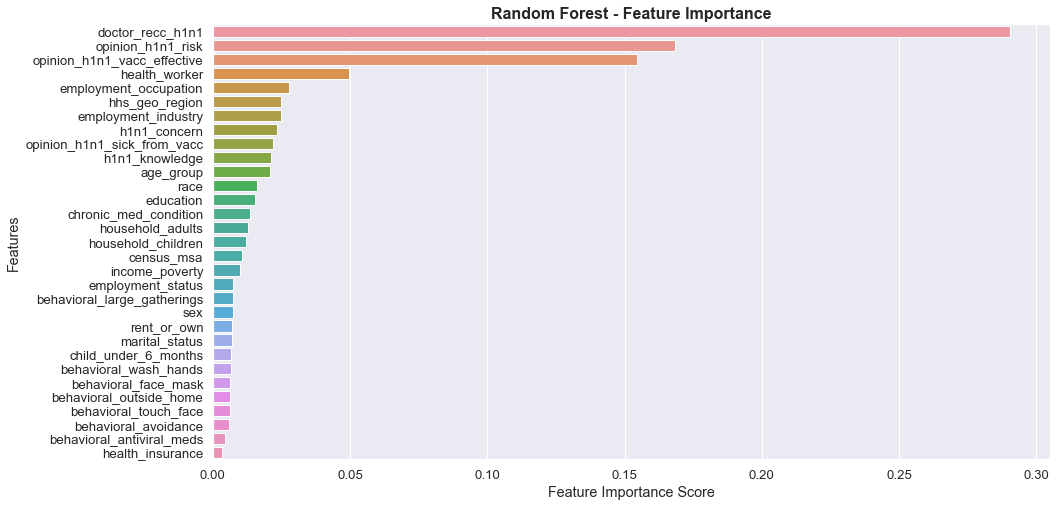

In [149]:
importance = grid_search_rf.best_estimator_.feature_importances_
feature_imp = pd.Series(importance, index = X.columns).sort_values(ascending = False)
feature_imp
sns.set(style = 'darkgrid', font_scale = 1.2)
plt.figure(figsize = (15, 8))
# Visualize the Importance Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Random Forest - Feature Importance', weight = 'bold', fontsize = 16)
plt.show()

# Conclusion:

* People who have more concerned about seasonal vaccine are more likely to be vaccinated.
* There are very few people who take antiviral medications and among them get vaccinated while the rest do not. And there are lot of people who didn't take antiviral medications who have also taken a good amount of vaccine.
* We observe that most people get vaccination on doctor's recommendation.
* Some have chronic medical conditions those also getting vaccinated in large amount.
* Health worker rate will be more of getting h1n1 vaccine as compare to who doesn't health worker.
* More people get vaccine and they said h1n1 seasonal vaccine is very effective.
* Respondent's opinion about risk of getting sick h1n1 flu without vaccine is very high and more of them get vaccinated.
* Respondent's opinion are not at all worried of getting sick from seasonal vaccine and more people are get vaccinated.